In [1]:
# Program to develop baseline model using data generated from the perfect CSI model. 
# This baseline model is used for transfer learning in imperfect CSI scenario.
# It also verifies the constraints used in perfect CSI.

In [2]:
# Importing library

# Below five lines for generalization
import numpy as np
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

# import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn import model_selection

from sklearn.decomposition import PCA
#To show the output within the jupyter notebook itself!
%matplotlib inline 

from keras import layers
from keras import models
from keras.layers import Activation, LeakyReLU, PReLU, ELU
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout, LeakyReLU
import io
import os
import requests

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
# Input data i.e. xd (float values) # channel gains

inputs = pd.read_csv("xd_perf_CSI.csv", header=None)
inputs.shape

(100000, 40)

In [4]:
type(inputs)

pandas.core.frame.DataFrame

In [5]:
inputs.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000005,0.000025,0.000065,0.000004,0.000031,0.399916,2.942910,0.737074,0.791117,0.079002,...,8.653949e-08,3.078901e-07,2.219365e-07,2.124470e-07,4.613507e-07,1.480653e-06,4.235905e-07,2.884507e-06,6.127404e-07,7.755382e-07
1,0.000004,0.000035,0.000005,0.000010,0.000004,0.195789,15.703223,0.110915,0.086298,0.243130,...,2.795379e-06,5.241102e-07,4.627358e-06,3.550336e-05,2.974460e-06,5.004695e-07,8.720214e-06,1.098874e-06,3.515984e-07,8.800185e-07
2,0.000150,0.000071,0.000008,0.000068,0.000056,0.814584,0.156477,3.883978,0.695241,0.080262,...,2.626613e-07,2.800350e-07,9.390747e-07,9.365605e-05,4.573018e-07,8.482712e-07,1.547381e-06,1.145748e-05,1.074974e-06,4.372926e-07
3,0.000007,0.000030,0.000207,0.000010,0.000023,745.474527,0.294007,0.240997,0.076554,2.426897,...,5.182626e-06,1.588640e-07,1.284886e-06,5.112487e-07,9.546741e-07,1.457671e-05,2.270242e-07,3.175394e-06,9.152543e-07,1.075719e-06
4,0.000005,0.000259,0.000007,0.000014,0.000005,0.243721,62.913418,0.352107,3572.655100,0.089749,...,4.676699e-07,4.292674e-06,5.284879e-07,2.570360e-06,4.268990e-07,1.842633e-07,1.389491e-06,1.868778e-07,1.469790e-06,1.737197e-07


In [6]:
# Output data1 i.e. ypd (float values) # power allocations

output1 = pd.read_csv("ypd_perf_CSI.csv", header=None)
output1.shape

(100000, 50)

In [7]:
output1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.085632,0.014814,0.043372,0.019506,0.019799,0.029514,0.032606,0.971490,0.102808,0.047205,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,0.027044,0.011781,0.010873,0.014082,0.020324,0.014761,0.009644,0.003260,0.003037,0.014513,...,1.0,1.0,1.0,0.741073,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000000,1.000000,0.004725,0.011400,1.000000,1.000000,1.000000,0.008067,0.025758,0.005398,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
3,0.013453,0.319816,0.030034,0.040173,0.009187,0.007013,0.050149,0.041675,0.016536,0.003334,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
4,0.087969,0.035512,0.284811,0.027271,0.080071,0.001187,0.016135,1.000000,0.020741,0.001118,...,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
# Output data2 i.e. ybdr (float values) # channel assignments

output2 = pd.read_csv("ybdr_perf_CSI.csv", header=None)
output2.shape

(100000, 25)

In [9]:
output2.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.070261,0.333929,0.233217,0.294513,0.068080,0.275070,-0.001628,0.243402,0.153191,0.329966,...,0.184541,0.299995,0.011336,0.368292,0.135837,0.277775,0.138786,0.285762,-0.004564,0.302241
1,0.265455,0.246233,0.098914,0.174861,0.214536,0.318390,0.293150,0.234420,0.154040,0.000000,...,0.103370,0.181522,0.234584,0.200114,0.280410,0.286918,0.262044,0.186324,0.102622,0.162092
2,0.318843,0.095262,0.127677,0.041980,0.416238,0.000000,0.156312,0.409557,0.440661,-0.006529,...,0.000000,0.086967,0.445079,0.472947,-0.004993,0.295546,0.198443,0.093568,-0.002881,0.415323
3,0.310501,0.150239,0.000000,0.295248,0.244012,0.171727,0.173537,0.258102,0.210070,0.186563,...,0.209132,0.236346,0.263959,0.132179,0.158384,0.177541,0.204561,0.208021,0.199687,0.210191
4,0.057067,-0.005971,0.025768,0.421879,0.501256,0.309997,0.186518,0.493742,0.020370,-0.010627,...,0.314939,0.138942,0.478044,0.073853,-0.005778,0.038425,0.607856,0.162984,-0.009359,0.200094


In [10]:
# Both Output data combined i.e. ypd and ybdr (power allocations + channel assignments)

outputc = pd.concat([output1, output2], axis=1)
outputc.shape

(100000, 75)

In [11]:
outputc.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.085632,0.014814,0.043372,0.019506,0.019799,0.029514,0.032606,0.971490,0.102808,0.047205,...,0.184541,0.299995,0.011336,0.368292,0.135837,0.277775,0.138786,0.285762,-0.004564,0.302241
1,0.027044,0.011781,0.010873,0.014082,0.020324,0.014761,0.009644,0.003260,0.003037,0.014513,...,0.103370,0.181522,0.234584,0.200114,0.280410,0.286918,0.262044,0.186324,0.102622,0.162092
2,1.000000,1.000000,0.004725,0.011400,1.000000,1.000000,1.000000,0.008067,0.025758,0.005398,...,0.000000,0.086967,0.445079,0.472947,-0.004993,0.295546,0.198443,0.093568,-0.002881,0.415323
3,0.013453,0.319816,0.030034,0.040173,0.009187,0.007013,0.050149,0.041675,0.016536,0.003334,...,0.209132,0.236346,0.263959,0.132179,0.158384,0.177541,0.204561,0.208021,0.199687,0.210191
4,0.087969,0.035512,0.284811,0.027271,0.080071,0.001187,0.016135,1.000000,0.020741,0.001118,...,0.314939,0.138942,0.478044,0.073853,-0.005778,0.038425,0.607856,0.162984,-0.009359,0.200094


In [12]:
# Pre-processing

x = inputs.values  # converting dataframe "inputs" into array form
# x

In [13]:
############################### PCA starts from here ########################################

In [14]:
# Scaling
# Standardize features by removing mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler 
x_scaled = StandardScaler().fit_transform(inputs)  # normalizing the features
x_scaled.shape

(100000, 40)

In [15]:
type(x_scaled)

numpy.ndarray

In [16]:
# Checking whether the normalized data has a mean of zero and a standard deviation of one

np.mean(x_scaled), np.std(x_scaled)

(4.4408920985006264e-20, 0.9999999999999999)

In [17]:
# Converting normalized/scaled features into a tabular format with the help of dataframe

feature_columns = ['feature'+str(i) for i in range(x_scaled.shape[1])]
x_scaled = pd.DataFrame(x_scaled, columns=feature_columns) # Normalised feature
x_scaled.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39
0,-0.579448,-0.248998,0.419605,-0.605506,-0.147588,-0.003461,-0.007439,-0.006367,-0.003191,-0.004136,...,-0.008351,-0.011937,-0.010767,-0.014653,-0.014222,-0.005530,-0.016163,-0.003475,-0.013560,-0.014794
1,-0.596735,-0.087224,-0.576486,-0.510046,-0.606779,-0.003461,-0.007439,-0.006367,-0.003191,-0.004136,...,-0.007752,-0.011897,-0.009800,0.000450,-0.013414,-0.005593,-0.011703,-0.003483,-0.013644,-0.014750
2,1.832785,0.512759,-0.535903,0.466150,0.266108,-0.003461,-0.007439,-0.006367,-0.003191,-0.004136,...,-0.008312,-0.011942,-0.010610,0.025336,-0.014223,-0.005571,-0.015559,-0.003437,-0.013412,-0.014934
3,-0.544358,-0.174836,2.818359,-0.510354,-0.291515,-0.003461,-0.007439,-0.006367,-0.003191,-0.004136,...,-0.007223,-0.011964,-0.010534,-0.014525,-0.014063,-0.004701,-0.016268,-0.003474,-0.013463,-0.014669
4,-0.592373,3.655131,-0.552024,-0.436669,-0.580576,-0.003461,-0.007438,-0.006367,-0.003191,-0.004136,...,-0.008267,-0.011210,-0.010700,-0.013644,-0.014233,-0.005613,-0.015644,-0.003487,-0.013285,-0.015044


In [18]:
x_scaled.shape # shape of x before PCA

(100000, 40)

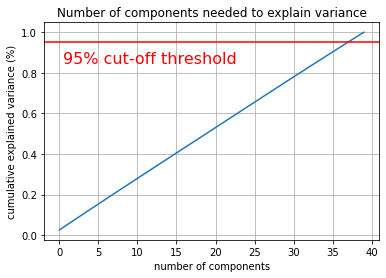

In [19]:
# Choosing number of components for PCA

pca = PCA().fit(x_scaled) # scaled version of original data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance (%)')
plt.title('Number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.grid()
# plt.savefig('output1.pdf')
# plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Summary- To get 95% of variance (information) explained I need 38 principal components.
# Further Analyis-
# This curve quantifies how much of the total, N-dimensional variance is contained within the first N components.
# Here we can see, to cover 90% of variance, we need to take N=35 components and to cover/describe 95% of variance,
# we need to take atleast 38 components. Here n=40 is a good choice.
# Summary- select n such that the 100 % variance will be covered.

In [21]:
# Dimensionality reduction using SVD to project to lower dimensional space
# Projecting 40 dimensional data to 2 dimensional principal components

from sklearn.decomposition import PCA 
pca = PCA(n_components=40) # n_components=number of components (based on above plot)
x_pca = pca.fit_transform(x_scaled)


In [22]:
x_pca.shape # shape of x after PCA

(100000, 40)

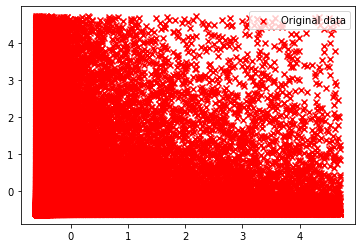

In [23]:
# Original data before PCA

plt.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1], c='r', marker='x', label='Original data')
plt.legend(loc='upper right')
plt.show()

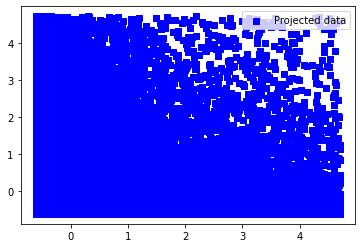

In [24]:
# To understand the effect of dimensionality reduction, we can perform the
# inverse transform of reduced data 
# Data after PCA

x_new = pca.inverse_transform(x_pca)
plt.scatter(x_new[:, 0], x_new[:, 1], c='b', marker='s', label='Projected data')
plt.legend(loc='upper right')
plt.show()


In [25]:
# Analysis of PCA plot-
# The information along the least important principal axis is removed, leaving only the component of
# the data with the highest variance. The fraction of variance that is cut out is roughly a measure 
# of how much "information" is discarded in this reduction of dimensionality.
# This reduced-dimension dataset is in some senses "good enough" to encode the most important 
# relationships between the points: despite reducing the dimension of the data by 50%, 
# the overall relationship between the data points are mostly preserved.

In [26]:
# The components correspond to combinations of original features.
print(pca.components_)


[[ 0.09221993  0.02048477  0.00905684 ...  0.14032288 -0.04000375
   0.1023153 ]
 [ 0.46004754 -0.02300398 -0.10970271 ... -0.03839489  0.05139251
  -0.09599772]
 [ 0.35380824 -0.08409564 -0.29316498 ...  0.09340426 -0.12979741
  -0.08484707]
 ...
 [ 0.22626898 -0.17521553 -0.31545099 ...  0.1388687  -0.11820855
   0.02071883]
 [-0.42287126  0.18416525 -0.25867666 ...  0.07626866 -0.06960536
   0.02636493]
 [ 0.29404538 -0.1421225   0.17382115 ...  0.05266112  0.07122796
   0.12852797]]


<AxesSubplot:>

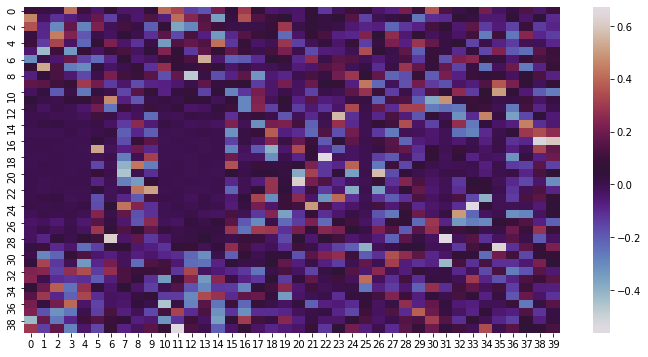

In [27]:
# Visualizing components using heatmap
# Heatmap and color bar represent correlation between 
# various feature and the principal component.

map= pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

# map= pd.DataFrame(pca.components_,columns=data['feature_names'])

In [28]:
print(pca.explained_variance_)

[1.03471886 1.03120836 1.02761915 1.0225504  1.01945071 1.01538107
 1.01446547 1.01324851 1.01023558 1.00766009 1.00438643 1.00245574
 1.00112732 1.0006749  1.00034048 1.00021106 1.00018551 1.00012713
 1.00007994 1.0000542  1.00004607 1.00003387 1.00001486 0.99982052
 0.99961888 0.99934937 0.99922764 0.99856303 0.99755127 0.99467375
 0.99188988 0.99026558 0.98880216 0.9851919  0.98273377 0.97781827
 0.97484382 0.97465483 0.97208686 0.96703277]


In [29]:
# Finding explained variance ratio to see amount of information or variance each principal component holds
# after projecting the data to a lower dimensional sub-space.

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.02586771 0.02577995 0.02569022 0.0255635  0.02548601 0.02538427
 0.02536138 0.02533096 0.02525564 0.02519125 0.02510941 0.02506114
 0.02502793 0.02501662 0.02500826 0.02500503 0.02500439 0.02500293
 0.02500175 0.02500111 0.0250009  0.0250006  0.02500012 0.02499526
 0.02499022 0.02498348 0.02498044 0.02496383 0.02493853 0.0248666
 0.024797   0.02475639 0.02471981 0.02462955 0.0245681  0.02444521
 0.02437085 0.02436613 0.02430193 0.02417558]


In [30]:
# Ananlysis of PCA result above
# From the above output, we can observe that the principal component 1 holds only 2% of the information
# while the principal component 2 holds only 2% of the information. 
# Also, the other point to note is that while projecting fourty-dimensional data to a two-dimensional data, 
# 96 % information was lost.

In [31]:
##################################### PCA over here #########################################

In [32]:
type(outputc)

pandas.core.frame.DataFrame

In [33]:
y = outputc.values # converting dataframe "outputc" in array form i.e. 'y' is now in array form 
y # y is combination of power assignments and channel assignments both.

array([[ 0.08563168,  0.01481353,  0.04337217, ...,  0.28576248,
        -0.00456352,  0.30224054],
       [ 0.02704404,  0.01178144,  0.01087333, ...,  0.18632389,
         0.10262181,  0.16209238],
       [ 1.        ,  1.        ,  0.00472507, ...,  0.09356838,
        -0.00288091,  0.41532324],
       ...,
       [ 0.02609397,  0.02011302,  0.04177459, ...,  0.11921569,
         0.25089991,  0.15840992],
       [ 0.00672735,  0.02278807,  0.02085253, ...,  0.        ,
         0.35552579,  0.33208167],
       [ 0.00626899,  0.01752107,  0.00490454, ..., -0.00287454,
         0.24768001,  0.29266391]])

In [34]:
y.shape

(100000, 75)

In [35]:
type(y)

numpy.ndarray

In [36]:
y[0]

array([ 0.08563168,  0.01481353,  0.04337217,  0.0195062 ,  0.01979871,
        0.02951413,  0.03260568,  0.97148972,  0.10280768,  0.04720494,
        0.00692099,  0.00321077,  0.02397657,  0.00443336,  0.00638016,
        0.01198587,  0.03277107,  0.02469988,  0.02380879,  0.04718128,
        0.01778242,  0.00543016,  0.03418709,  0.00764046,  0.00954283,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.07026101,  0.33392876,  0.23321736,  0.29451313,  0.06807973,
        0.27506952, -0.00162795,  0.24340161,  0.1531909 ,  0.32996592,
        0.14325395,  0.27867915,  0.21842163,  0.2381216 ,  0.12152367,
        0.18454113,  0.2999946 ,  0.01133574,  0.36829159,  0.13

In [37]:
y[0,0:50]  # First row and initial 50 columns of y i.e. first row of power assignments.

array([0.08563168, 0.01481353, 0.04337217, 0.0195062 , 0.01979871,
       0.02951413, 0.03260568, 0.97148972, 0.10280768, 0.04720494,
       0.00692099, 0.00321077, 0.02397657, 0.00443336, 0.00638016,
       0.01198587, 0.03277107, 0.02469988, 0.02380879, 0.04718128,
       0.01778242, 0.00543016, 0.03418709, 0.00764046, 0.00954283,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [38]:
# Splitting data for training and testing 
# Here both x and y are in array form (non-scaled)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=42) 

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [39]:
# Model mixed for x=> y mapping i.e. output1 + output2 (ypd+ybdr)

In [40]:
# Building neural network

model = Sequential()
model.add(Dense(40, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal')) # Input layer and 1st hidden layer
model.add(Dense(20, activation='relu', kernel_initializer='random_normal')) # 2nd Hidden layer 
model.add(Dense(5, activation='relu', kernel_initializer='random_normal')) # 3rd Hidden layer 
model.add(Dense(y.shape[1], activation='linear', kernel_initializer='random_normal')) # Output Layer 

In [41]:
# Compiling Neural network

from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mean_absolute_error']) 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [42]:
# Fitting Neural network to training set

model_history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, verbose=2, callbacks=[monitor], epochs=1000)


Epoch 1/1000
313/313 - 3s - loss: 1596283.0000 - mean_absolute_error: 5.0650 - val_loss: 0.3798 - val_mean_absolute_error: 0.4409
Epoch 2/1000
313/313 - 1s - loss: 0.3928 - mean_absolute_error: 0.4396 - val_loss: 0.3742 - val_mean_absolute_error: 0.4373
Epoch 3/1000
313/313 - 1s - loss: 0.3705 - mean_absolute_error: 0.4349 - val_loss: 0.3666 - val_mean_absolute_error: 0.4324
Epoch 4/1000
313/313 - 1s - loss: 0.3620 - mean_absolute_error: 0.4296 - val_loss: 0.3571 - val_mean_absolute_error: 0.4265
Epoch 5/1000
313/313 - 1s - loss: 0.3516 - mean_absolute_error: 0.4232 - val_loss: 0.3459 - val_mean_absolute_error: 0.4197
Epoch 6/1000
313/313 - 1s - loss: 0.3395 - mean_absolute_error: 0.4159 - val_loss: 0.3329 - val_mean_absolute_error: 0.4119
Epoch 7/1000
313/313 - 1s - loss: 0.3258 - mean_absolute_error: 0.4076 - val_loss: 0.3184 - val_mean_absolute_error: 0.4031
Epoch 8/1000
313/313 - 1s - loss: 0.3105 - mean_absolute_error: 0.3983 - val_loss: 0.3023 - val_mean_absolute_error: 0.3933
Ep

In [43]:
y_train

array([[ 0.08563168,  0.01481353,  0.04337217, ...,  0.28576248,
        -0.00456352,  0.30224054],
       [ 0.02704404,  0.01178144,  0.01087333, ...,  0.18632389,
         0.10262181,  0.16209238],
       [ 1.        ,  1.        ,  0.00472507, ...,  0.09356838,
        -0.00288091,  0.41532324],
       ...,
       [ 0.01384246,  0.01119361,  0.12418606, ...,  0.28510943,
         0.23693891,  0.03536922],
       [ 0.01679051,  0.01831766,  0.01295655, ...,  0.19763218,
         0.399343  ,  0.40747098],
       [ 0.01997582,  0.01028657,  0.01087919, ...,  0.25776034,
        -0.00205178,  0.39391715]])

In [44]:
# Making the predictions for testing

# Predicting the Test set results
y_pred = model.predict(x_test) 
y_pred

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [45]:
y_pred.shape

(20000, 75)

In [46]:
# Evaluating the model # Test error

# Measure MSE error  
mse_test = metrics.mean_squared_error(y_test, y_pred)
print("Test Mean Squared error (MSE): {}".format(mse_test))

# Measure RMSE error 
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Test Root mean squared error (RMSE): {}".format(rmse_test))

# Measure MAE error
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print("Test Mean absolute error (MAE): {}".format(mae_test))

Test Mean Squared error (MSE): 0.03913066478335977
Test Root mean squared error (RMSE): 0.19781472337356432
Test Mean absolute error (MAE): 0.11731031505884874


In [47]:
# Making the predictions for training

# Predicting the Training set results
y_pred_train = model.predict(x_train) 
y_pred_train

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [48]:
y_pred_train.shape 

(80000, 75)

In [49]:
# Evaluating the model # Training error

# Measure MSE error  
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print("Training Mean Squared error (MSE): {}".format(mse_train))

# Measure RMSE error 
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print("Training Root mean squared error (RMSE): {}".format(rmse_train))

# Measure MAE error
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
print("Training Mean absolute error (MAE): {}".format(mae_train))

Training Mean Squared error (MSE): 0.03911520892008426
Training Root mean squared error (RMSE): 0.1977756530012839
Training Mean absolute error (MAE): 0.11736179469162536


In [50]:
y_pred_flat = y_pred.flatten()
y_pred_flat

array([0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
       0.19993187], dtype=float32)

In [51]:
y_test_flat = y_test.flatten()
y_test_flat

array([ 0.01462454,  0.0561331 ,  1.        , ..., -0.00287454,
        0.24768001,  0.29266391])

In [52]:
# Regression score for test

r2_score_test = metrics.r2_score(y_test_flat, y_pred_flat)
print("R2 Score Test: {}".format(r2_score_test))

R2 Score Test: 0.7907543138918904


In [53]:
y_pred_train_flat = y_pred_train.flatten()
y_pred_train_flat

array([0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
       0.19993187], dtype=float32)

In [54]:
y_train_flat = y_train.flatten()
y_train_flat

array([ 0.08563168,  0.01481353,  0.04337217, ...,  0.25776034,
       -0.00205178,  0.39391715])

In [55]:
# Regression score for training

r2_score_train = metrics.r2_score(y_train_flat, y_pred_train_flat)
print("R2 Score Train: {}".format(r2_score_train))

R2 Score Train: 0.7907852224202386


In [56]:
############### PDF and CDF of any column of Input (x_train) #############

In [57]:
x_train

array([[5.38792232e-06, 2.51338955e-05, 6.45360587e-05, ...,
        2.88450688e-06, 6.12740376e-07, 7.75538172e-07],
       [4.35163481e-06, 3.48176493e-05, 5.42595693e-06, ...,
        1.09887410e-06, 3.51598447e-07, 8.80018478e-07],
       [1.49992798e-04, 7.07325992e-05, 7.83419358e-06, ...,
        1.14574809e-05, 1.07497441e-06, 4.37292577e-07],
       ...,
       [4.99908808e-06, 1.20267513e-05, 9.02656460e-06, ...,
        3.00972712e-07, 2.67819529e-06, 2.20461132e-07],
       [5.34744235e-06, 1.38269540e-04, 5.87192834e-06, ...,
        2.90953041e-07, 1.31762163e-06, 4.15821033e-06],
       [5.42325860e-06, 2.60057004e-04, 9.18533948e-05, ...,
        3.33990151e-07, 1.91411048e-07, 3.48170783e-05]])

In [58]:
x_train.shape

(80000, 40)

In [59]:
x_train[:,10] # Tenth column of x_train 

array([5.71084254e-06, 1.33340745e-04, 5.04965539e-06, ...,
       5.71192553e-06, 4.27513383e-06, 2.36743639e-05])

In [60]:
x_train[:,10].shape

(80000,)

In [61]:
# Checking PDF and CDF of tenth column of x_train (for example)

data=x_train[:,10] 
data

array([5.71084254e-06, 1.33340745e-04, 5.04965539e-06, ...,
       5.71192553e-06, 4.27513383e-06, 2.36743639e-05])

Printing the counts for histogram:
 [58706  8423  4213  2647  1847  1360  1086   910   689   119]
Sum of counts is:
 80000
Printing edges of bins: 
 [3.59097573e-06 3.88904062e-05 7.41898367e-05 1.09489267e-04
 1.44788698e-04 1.80088128e-04 2.15387559e-04 2.50686989e-04
 2.85986420e-04 3.21285850e-04 3.56585281e-04]
PDF is as follows:
 [0.733825  0.1052875 0.0526625 0.0330875 0.0230875 0.017     0.013575
 0.011375  0.0086125 0.0014875]


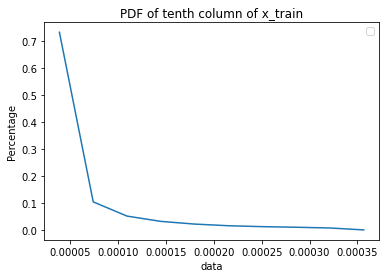

In [62]:
# To get PDF
counts, bin_edges= np.histogram(data, bins=10, density=False)
print("Printing the counts for histogram:\n", counts)
pdf = counts/(sum(counts))
print("Sum of counts is:\n", sum(counts))
print("Printing edges of bins: \n", bin_edges)
print("PDF is as follows:\n",pdf);

plt.gca().legend(('Pdf'))
plt.title('PDF of tenth column of x_train')
plt.xlabel("data")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)

Printing the counts for histogram:
 [58706  8423  4213  2647  1847  1360  1086   910   689   119]
Sum of count is:
 80000
Printing edges of bins:
 [3.59097573e-06 3.88904062e-05 7.41898367e-05 1.09489267e-04
 1.44788698e-04 1.80088128e-04 2.15387559e-04 2.50686989e-04
 2.85986420e-04 3.21285850e-04 3.56585281e-04]
PDF is as follows:
 [0.733825  0.1052875 0.0526625 0.0330875 0.0230875 0.017     0.013575
 0.011375  0.0086125 0.0014875]
CDF is as follows:
 [0.733825  0.8391125 0.891775  0.9248625 0.94795   0.96495   0.978525
 0.9899    0.9985125 1.       ]


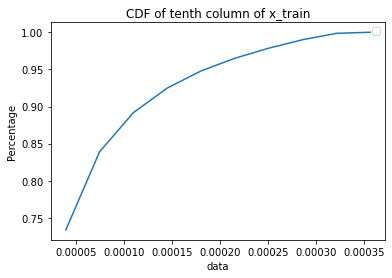

In [63]:
# To get CDF
counts, bin_edges = np.histogram(data, bins=10, density=False)

print("Printing the counts for histogram:\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is:\n",sum(counts))
print("Printing edges of bins:\n",bin_edges)
print("PDF is as follows:\n",pdf);

cdf = np.cumsum(pdf) # cdf
print("CDF is as follows:\n",cdf)
plt.gca().legend(('Cdf'))
plt.title('CDF of tenth column of x_train')
plt.xlabel("data")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],cdf)

[58706  8423  4213  2647  1847  1360  1086   910   689   119]
[0.733825  0.1052875 0.0526625 0.0330875 0.0230875 0.017     0.013575
 0.011375  0.0086125 0.0014875]
[3.59097573e-06 3.88904062e-05 7.41898367e-05 1.09489267e-04
 1.44788698e-04 1.80088128e-04 2.15387559e-04 2.50686989e-04
 2.85986420e-04 3.21285850e-04 3.56585281e-04]


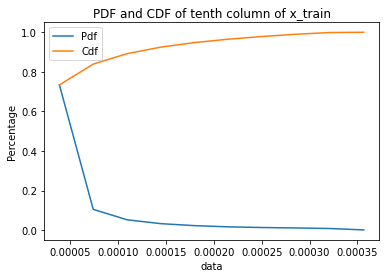

In [64]:
# PDF and CDF both
counts, bin_edges = np.histogram(data, bins=10, density=False)

print(counts)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('Pdf','Cdf'))
plt.title('PDF and CDF of tenth column of x_train')
plt.xlabel("data")
plt.ylabel("Percentage")
# plt.savefig('PDF and CDF of 10th column of x_train for 80_20 split.pdf')
plt.show();

In [65]:
######################### Constraint verification for test data ##########################

In [66]:
y_pred = model.predict(x_test)
y_pred

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [67]:
y_pred.shape

(20000, 75)

In [68]:
y_pred[0] # First row of y_pred

array([0.14201507, 0.1337895 , 0.14171444, 0.14280984, 0.13978766,
       0.13500574, 0.14380507, 0.14263369, 0.13464125, 0.13980097,
       0.14275758, 0.13999927, 0.14110756, 0.14222096, 0.14182906,
       0.14141998, 0.14142697, 0.14121707, 0.14427717, 0.13969077,
       0.13934186, 0.14557457, 0.14254934, 0.14291397, 0.1434888 ,
       0.9736362 , 0.9869385 , 0.9867863 , 0.97259825, 0.9874944 ,
       0.9870255 , 0.98023874, 0.9868931 , 0.98706985, 0.9111182 ,
       0.8704515 , 0.9868433 , 0.9543202 , 0.9601755 , 0.9864024 ,
       0.82686114, 0.970568  , 0.98726904, 0.9757662 , 0.9881003 ,
       0.9831599 , 0.9866829 , 0.9870719 , 0.97651505, 0.9481746 ,
       0.1999395 , 0.19965795, 0.200406  , 0.19914235, 0.19990122,
       0.19637614, 0.20073436, 0.19944742, 0.20085855, 0.20004793,
       0.20073742, 0.1994464 , 0.19621366, 0.19914466, 0.19532816,
       0.19779073, 0.19382355, 0.20014127, 0.18990938, 0.1994348 ,
       0.17873211, 0.20000958, 0.19550133, 0.19779658, 0.19993

In [69]:
y_pred[1] # Second row of y_pred

array([0.14201507, 0.1337895 , 0.14171444, 0.14280984, 0.13978766,
       0.13500574, 0.14380507, 0.14263369, 0.13464125, 0.13980097,
       0.14275758, 0.13999927, 0.14110756, 0.14222096, 0.14182906,
       0.14141998, 0.14142697, 0.14121707, 0.14427717, 0.13969077,
       0.13934186, 0.14557457, 0.14254934, 0.14291397, 0.1434888 ,
       0.9736362 , 0.9869385 , 0.9867863 , 0.97259825, 0.9874944 ,
       0.9870255 , 0.98023874, 0.9868931 , 0.98706985, 0.9111182 ,
       0.8704515 , 0.9868433 , 0.9543202 , 0.9601755 , 0.9864024 ,
       0.82686114, 0.970568  , 0.98726904, 0.9757662 , 0.9881003 ,
       0.9831599 , 0.9866829 , 0.9870719 , 0.97651505, 0.9481746 ,
       0.1999395 , 0.19965795, 0.200406  , 0.19914235, 0.19990122,
       0.19637614, 0.20073436, 0.19944742, 0.20085855, 0.20004793,
       0.20073742, 0.1994464 , 0.19621366, 0.19914466, 0.19532816,
       0.19779073, 0.19382355, 0.20014127, 0.18990938, 0.1994348 ,
       0.17873211, 0.20000958, 0.19550133, 0.19779658, 0.19993

In [70]:
# y_pred[:0].shape

In [71]:
x_test

array([[1.34558689e-05, 6.82557732e-05, 4.98621481e-05, ...,
        6.09807778e-07, 2.90704091e-05, 4.27329043e-06],
       [1.66123507e-04, 1.28714729e-05, 5.13788725e-06, ...,
        1.74625446e-07, 9.47965552e-07, 4.70681765e-07],
       [1.46405882e-04, 1.13283923e-05, 1.32278592e-05, ...,
        1.62947437e-07, 7.16197226e-06, 2.19566390e-06],
       ...,
       [5.15721823e-06, 4.49261890e-06, 1.17043281e-05, ...,
        7.47029671e-07, 2.29201120e-07, 1.89410894e-07],
       [2.05725982e-05, 9.04168212e-06, 4.02170979e-06, ...,
        9.56918203e-07, 4.55078389e-07, 1.47884928e-07],
       [2.68454975e-05, 8.79461103e-06, 6.60689926e-06, ...,
        3.20391946e-07, 1.25954046e-07, 1.06323954e-07]])

In [72]:
x_test.shape

(20000, 40)

In [73]:
y_conc_new=y_pred
y_conc_new

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [74]:
y_conc_new.shape

(20000, 75)

In [75]:
ypd_new=y_conc_new[:,0:50] # ypd_new is the first 50 elements of y_conc_new i.e. power assignments
ypd_new

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ]], dtype=float32)

In [76]:
ypd_new.shape

(20000, 50)

In [77]:
pb=ypd_new[:,0:25] # Initial 25 elements of ypd_new
pb

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ]], dtype=float32)

In [78]:
pb.shape

(20000, 25)

In [79]:
pd=ypd_new[:,25:50] # Next 25 elements of ypd_new (25th to 50th column)
pd

array([[0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       ...,
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ]], dtype=float32)

In [80]:
pd.shape

(20000, 25)

In [81]:
ybdr_new=y_conc_new[:,50:75] # ybdr_new is the last 25 elements of y_conc_new (channel assignments), which has to be converted in binary
ybdr_new.shape

(20000, 25)

In [82]:
# Converting ybdr_new in ybd_binary such that it will have 1 and 0 (5 elements in one sub-group, and total 5 sub-groups)
# 5X5=25 elements in ybdr_new
# Logic to convert float in Binary:-
# Take 5 elements of first sub-group and assign "1" to the highest value and rest as "0" 
# and similarly for remaining sub-groups

In [83]:
ybdr_new

array([[0.1999395 , 0.19965795, 0.200406  , ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.1999395 , 0.19965795, 0.200406  , ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.1999395 , 0.19965795, 0.200406  , ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.1999395 , 0.19965795, 0.200406  , ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.1999395 , 0.19965795, 0.200406  , ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.1999395 , 0.19965795, 0.200406  , ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [84]:
ybdr_new[0]

array([0.1999395 , 0.19965795, 0.200406  , 0.19914235, 0.19990122,
       0.19637614, 0.20073436, 0.19944742, 0.20085855, 0.20004793,
       0.20073742, 0.1994464 , 0.19621366, 0.19914466, 0.19532816,
       0.19779073, 0.19382355, 0.20014127, 0.18990938, 0.1994348 ,
       0.17873211, 0.20000958, 0.19550133, 0.19779658, 0.19993187],
      dtype=float32)

In [85]:
ybdr_new[1]

array([0.1999395 , 0.19965795, 0.200406  , 0.19914235, 0.19990122,
       0.19637614, 0.20073436, 0.19944742, 0.20085855, 0.20004793,
       0.20073742, 0.1994464 , 0.19621366, 0.19914466, 0.19532816,
       0.19779073, 0.19382355, 0.20014127, 0.18990938, 0.1994348 ,
       0.17873211, 0.20000958, 0.19550133, 0.19779658, 0.19993187],
      dtype=float32)

In [86]:
# Converting ybdr_new in ybd_binary i.e. converting continuous channel assignments 
# into binary form based on above logic

ybd_binary=[]
for rows in ybdr_new:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    ybd_binary.append(tempList)

In [87]:
ybd_binary_array=np.array(ybd_binary) # converting list form of ybd_binary into array form 
ybd_binary_array

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [88]:
ybd_binary_array.shape

(20000, 25)

In [89]:
len(ybd_binary_array)

20000

In [90]:
len(ybd_binary_array[0]) # First row taken

25

In [91]:
ybd_binary_array[0] # First row output i.e. channel assignments

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [92]:
ybd_binary_array[1] # Second row output i.e. channel assignments

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [93]:
# Finding position of '1' in first row of ybd_binary_array i.e. Beta(i)
# Just for example here

for i in range (len(ybd_binary_array[0])):  # Here first row taken
    if ybd_binary_array[0][i]==1:
        subgroup=int((i)/5) +1
        ones_position=(i)%5 +1
        # print(subgroup)
        # print(ones_position)
        print(subgroup*10+ones_position)

13
24
31
43
52


In [94]:
# Taking all row and all columns of PB

pb=ypd_new[:,0:25]
# pb

In [95]:
len(pb)

20000

In [96]:
pb.shape[1]

25

In [97]:
pb[0]

array([0.14201507, 0.1337895 , 0.14171444, 0.14280984, 0.13978766,
       0.13500574, 0.14380507, 0.14263369, 0.13464125, 0.13980097,
       0.14275758, 0.13999927, 0.14110756, 0.14222096, 0.14182906,
       0.14141998, 0.14142697, 0.14121707, 0.14427717, 0.13969077,
       0.13934186, 0.14557457, 0.14254934, 0.14291397, 0.1434888 ],
      dtype=float32)

In [98]:
# Taking all row and all columns of PD

pd=ypd_new[:,25:50]
# pd

In [99]:
len(pd)

20000

In [100]:
pd.shape[1]

25

In [101]:
pd[0]

array([0.9736362 , 0.9869385 , 0.9867863 , 0.97259825, 0.9874944 ,
       0.9870255 , 0.98023874, 0.9868931 , 0.98706985, 0.9111182 ,
       0.8704515 , 0.9868433 , 0.9543202 , 0.9601755 , 0.9864024 ,
       0.82686114, 0.970568  , 0.98726904, 0.9757662 , 0.9881003 ,
       0.9831599 , 0.9866829 , 0.9870719 , 0.97651505, 0.9481746 ],
      dtype=float32)

In [102]:
# In input Xd i.e. channel gain file (40 elements are present), initial 5 elements are GBi i.e. GB1,GB2,.....,GB5. 
# Next 5 elements are GDj i.e. GD1,GD2,....,GD5. Next 5 elements are HBj i.e. HB1,HB2,....,HB5. Next 25 elements are
# HCij, which is sub-divided into 5 sub groups namely; HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, 
# HC41,......,HC45 and HC51,........,HC55.

In [103]:
x_test_new=x_test
x_test_new

array([[1.34558689e-05, 6.82557732e-05, 4.98621481e-05, ...,
        6.09807778e-07, 2.90704091e-05, 4.27329043e-06],
       [1.66123507e-04, 1.28714729e-05, 5.13788725e-06, ...,
        1.74625446e-07, 9.47965552e-07, 4.70681765e-07],
       [1.46405882e-04, 1.13283923e-05, 1.32278592e-05, ...,
        1.62947437e-07, 7.16197226e-06, 2.19566390e-06],
       ...,
       [5.15721823e-06, 4.49261890e-06, 1.17043281e-05, ...,
        7.47029671e-07, 2.29201120e-07, 1.89410894e-07],
       [2.05725982e-05, 9.04168212e-06, 4.02170979e-06, ...,
        9.56918203e-07, 4.55078389e-07, 1.47884928e-07],
       [2.68454975e-05, 8.79461103e-06, 6.60689926e-06, ...,
        3.20391946e-07, 1.25954046e-07, 1.06323954e-07]])

In [104]:
x_test_new.shape

(20000, 40)

In [105]:
x_test_new[0]

array([1.34558689e-05, 6.82557732e-05, 4.98621481e-05, 1.22396548e-05,
       2.77921503e-05, 9.31731801e-01, 1.79673831e+00, 1.24399644e+01,
       8.12202823e+00, 6.70972728e+00, 5.95872772e-05, 4.38426958e-06,
       1.93105726e-05, 1.21912875e-05, 2.24012116e-05, 4.98132186e-07,
       2.02863352e-06, 6.06817852e-05, 4.05005604e-07, 3.25384154e-07,
       1.98172271e-06, 1.17676151e-06, 8.10847829e-06, 4.89123167e-07,
       6.62104886e-07, 9.70157285e-06, 5.07587956e-07, 1.20581894e-06,
       4.17318651e-07, 9.73624061e-07, 4.25450855e-07, 5.08672405e-07,
       2.56915873e-06, 9.04285618e-07, 4.27049326e-07, 1.18686563e-06,
       1.96628607e-07, 6.09807778e-07, 2.90704091e-05, 4.27329043e-06])

In [106]:
gb=x_test_new[:,0:5] # Taking all rows and initial 5 columns of x_test_new # GB1,GB2,.....,GB5
gb

array([[1.34558689e-05, 6.82557732e-05, 4.98621481e-05, 1.22396548e-05,
        2.77921503e-05],
       [1.66123507e-04, 1.28714729e-05, 5.13788725e-06, 4.83179630e-06,
        1.70119489e-05],
       [1.46405882e-04, 1.13283923e-05, 1.32278592e-05, 3.77673969e-06,
        8.63213642e-06],
       ...,
       [5.15721823e-06, 4.49261890e-06, 1.17043281e-05, 8.57988177e-06,
        3.72949969e-06],
       [2.05725982e-05, 9.04168212e-06, 4.02170979e-06, 2.46718787e-05,
        4.68560711e-06],
       [2.68454975e-05, 8.79461103e-06, 6.60689926e-06, 7.30408389e-06,
        5.26493710e-06]])

In [107]:
len(gb)

20000

In [108]:
gb.shape[1]

5

In [109]:
gb[0] # First row of gb

array([1.34558689e-05, 6.82557732e-05, 4.98621481e-05, 1.22396548e-05,
       2.77921503e-05])

In [110]:
# Finding corresponding value of gb where "1" is located in ybd_binary_array # correct

for i in range(len(gb)): # 20000
    for j in range(gb.shape[1]):  # 5
        if ybd_binary_array[i][j]==1:
            print(gb[i])

[1.34558689e-05 6.82557732e-05 4.98621481e-05 1.22396548e-05
 2.77921503e-05]
[1.66123507e-04 1.28714729e-05 5.13788725e-06 4.83179630e-06
 1.70119489e-05]
[1.46405882e-04 1.13283923e-05 1.32278592e-05 3.77673969e-06
 8.63213642e-06]
[5.36482153e-05 5.77763640e-06 1.57085668e-05 4.77423173e-06
 2.07270514e-04]
[1.55034051e-05 1.58124133e-04 6.71393792e-06 4.55168263e-06
 1.64010395e-05]
[7.00161180e-06 1.72239965e-05 4.41834147e-05 1.93515333e-05
 4.95144397e-06]
[4.44700483e-05 8.66220733e-06 7.62896647e-06 6.71233099e-05
 3.63188604e-05]
[6.76741934e-06 7.41704573e-06 4.09838795e-05 2.48879724e-05
 4.29967519e-06]
[4.06406729e-06 4.64786355e-06 4.93611204e-06 5.53374315e-06
 4.24619614e-06]
[2.24445949e-05 5.89419460e-05 6.86730811e-06 7.27064164e-06
 4.29719539e-06]
[1.36384155e-05 1.77240398e-05 2.92045148e-05 1.60647219e-05
 3.84828638e-05]
[5.00249356e-05 4.23497698e-06 6.09139368e-06 4.67666907e-05
 4.30657016e-06]
[4.28265958e-06 6.65008919e-05 1.29648394e-05 2.61710246e-04
 9.

 1.31217722e-05]
[1.56107586e-04 9.40723949e-06 4.12631397e-05 2.31700874e-04
 4.25166279e-06]
[1.08566226e-05 9.52254262e-05 2.40785731e-05 4.59847307e-05
 6.27638436e-05]
[6.52781302e-06 1.48352472e-05 1.12706450e-04 2.81030363e-04
 1.02549742e-04]
[6.44615930e-06 6.97066153e-05 4.26247852e-05 2.31067050e-04
 4.11380990e-06]
[6.73082339e-05 1.97909019e-05 9.10366921e-06 1.30020133e-05
 9.02038448e-06]
[1.26774060e-05 1.54567730e-05 1.49380147e-05 5.23083788e-06
 9.02588617e-06]
[3.96110092e-06 2.32745618e-05 5.75128725e-06 1.75308630e-05
 6.93025005e-06]
[3.82802791e-06 8.95596014e-06 6.46068782e-05 4.91615547e-05
 4.30801346e-05]
[4.27024172e-05 3.23266824e-05 1.87270641e-05 4.32442704e-06
 1.06718203e-04]
[1.63180801e-05 9.06835635e-06 1.72469418e-05 1.15086217e-05
 3.89905102e-06]
[5.63790428e-06 8.84432804e-05 3.92421861e-06 7.23216657e-05
 1.07255300e-04]
[3.14158972e-05 8.93692752e-05 1.46463683e-05 6.07965134e-06
 5.66440964e-06]
[1.30846634e-05 1.84110635e-04 6.57262446e-05 1

 1.39714953e-05]
[5.77134333e-06 6.08959030e-06 1.40957831e-05 3.80504714e-06
 1.95259772e-05]
[3.33476046e-05 5.43263225e-06 1.06286145e-05 1.74624264e-05
 6.31620387e-06]
[5.67330688e-06 2.99399236e-05 7.65547368e-06 5.12358593e-06
 1.49850440e-05]
[7.64228140e-05 1.21823656e-05 1.00691338e-04 5.89434977e-06
 4.06040153e-06]
[1.66517097e-05 8.27812259e-05 8.00540721e-06 1.34504140e-04
 4.39506629e-06]
[2.55492171e-05 6.15435170e-06 3.96708641e-06 1.29754842e-04
 8.29293685e-06]
[1.51500541e-05 8.81963728e-05 1.15696288e-05 1.93401482e-04
 3.40107803e-05]
[1.00733691e-05 1.04122539e-05 5.66070115e-05 4.00592546e-06
 7.14135324e-06]
[7.24205309e-06 4.20832786e-05 2.81656237e-05 6.52365843e-06
 1.14715393e-05]
[8.13880763e-05 8.75729776e-06 2.66978961e-05 1.22310007e-04
 1.23226547e-05]
[1.25616421e-05 5.38935571e-05 2.51169509e-05 3.72433686e-05
 9.52376527e-06]
[6.78877517e-06 3.89528918e-06 2.58968708e-04 2.46242748e-04
 5.97613229e-06]
[1.20484057e-04 5.02694703e-06 5.13947330e-06 5

 1.85045188e-05]
[5.48456676e-06 8.90739760e-06 2.15190074e-04 1.65274852e-05
 1.63663970e-05]
[1.73821554e-04 8.95079822e-06 8.19259194e-05 3.44484110e-05
 2.52165969e-05]
[1.12758170e-04 6.48238452e-05 3.92446518e-06 3.71663837e-06
 7.24868510e-06]
[2.12704540e-05 5.81415544e-05 7.08680356e-06 3.71976906e-06
 2.78425846e-04]
[1.08513428e-04 6.90798994e-06 9.40478839e-06 1.07523984e-05
 5.05665946e-06]
[1.47592924e-04 3.16560453e-05 2.70473836e-04 1.75370436e-04
 1.14653531e-05]
[2.31923953e-04 1.34726067e-05 1.53166836e-05 5.41300263e-06
 1.50301389e-05]
[1.33965788e-05 7.90491205e-06 1.20192276e-05 3.40820874e-05
 5.32923772e-05]
[1.67966560e-05 5.03594245e-05 4.24187475e-06 2.04849992e-05
 2.37227016e-05]
[4.90623141e-06 8.92929016e-06 1.06087166e-05 4.48308199e-06
 1.31175305e-05]
[1.05429302e-04 9.35687837e-05 2.19210128e-05 6.04083799e-06
 6.01690552e-05]
[5.47802658e-05 3.95788731e-06 1.80772889e-05 4.74982992e-05
 1.25958339e-05]
[4.17554015e-06 6.20238657e-06 8.44240269e-05 3

[6.12322605e-06 4.77924453e-06 4.06986129e-06 5.06642886e-06
 5.14708468e-05]
[3.86947959e-06 2.41082494e-05 3.82163268e-06 2.88459230e-04
 3.65887382e-06]
[3.88292881e-06 2.39705316e-05 1.73452038e-05 1.30926040e-04
 1.81167385e-05]
[3.75815761e-06 3.29349770e-05 7.51458320e-06 4.90110207e-06
 1.00925799e-05]
[4.15097332e-06 1.19329307e-04 6.53717051e-06 8.36282063e-05
 4.36899616e-06]
[6.83609583e-05 5.60501904e-06 5.31978418e-06 4.13462325e-06
 1.60577247e-05]
[1.45846023e-04 4.69447940e-06 5.33295716e-06 5.33819004e-06
 4.63615338e-05]
[4.71669842e-06 3.93145493e-05 2.72029344e-05 2.88665241e-05
 4.96235478e-06]
[8.15915401e-06 3.95488977e-06 1.72320413e-04 3.82016949e-06
 4.75169821e-06]
[1.68690922e-05 1.60926716e-05 1.93914025e-05 2.37505746e-05
 2.35428439e-05]
[1.26361982e-05 4.88487923e-05 5.23524025e-06 8.20896753e-05
 1.04614999e-04]
[8.37785842e-06 8.17006960e-06 5.60217669e-06 7.40466098e-06
 2.77996678e-04]
[1.44473550e-04 2.01503634e-05 1.39382704e-05 8.43928181e-06
 5.

[3.69403548e-06 6.02600112e-06 3.87194920e-06 5.13463306e-06
 2.27894128e-05]
[1.31110831e-05 3.77224659e-05 3.73413819e-05 5.48629507e-06
 4.74592934e-06]
[1.04918475e-05 4.10045620e-05 7.37182230e-06 3.00954548e-04
 3.72765543e-05]
[4.15534966e-05 1.27385039e-04 5.57548460e-06 3.99812004e-05
 4.18653633e-06]
[4.24912870e-06 2.14672233e-05 2.53635993e-05 4.05856862e-06
 4.24814201e-06]
[4.03490404e-06 7.16701118e-05 1.44037747e-05 6.92819156e-06
 3.94494322e-06]
[5.88755652e-06 8.19512890e-06 5.28925354e-06 1.57304744e-05
 6.70256158e-06]
[5.27089394e-06 8.88152105e-05 3.64192936e-05 2.58535189e-05
 1.60417787e-05]
[4.38153768e-06 1.78401754e-04 2.11631415e-05 1.08350396e-04
 6.37191145e-06]
[7.69481431e-06 3.11876446e-04 1.42393174e-05 5.75135892e-06
 5.29131990e-05]
[8.08759764e-06 1.99881865e-05 5.23478923e-06 4.64076880e-05
 3.44689883e-05]
[2.21002651e-05 6.23941465e-06 3.49605744e-05 3.08045165e-05
 2.75911879e-05]
[4.65777759e-06 4.52864259e-06 4.17117385e-06 9.62000204e-06
 1.

 4.27643660e-06]
[1.62330370e-05 7.23974546e-06 6.07054051e-06 1.23175283e-05
 4.35650278e-06]
[1.05521852e-05 4.15413033e-05 5.46074120e-06 6.95469685e-06
 8.07151230e-05]
[6.69798817e-05 5.43838132e-06 5.06936170e-06 9.50191108e-05
 2.10673180e-05]
[1.15768982e-05 2.60635697e-05 3.25002205e-05 1.02713299e-05
 3.89338200e-06]
[2.01669728e-05 4.96527204e-06 5.12777859e-05 3.67597161e-06
 5.71472575e-05]
[1.49519506e-04 1.58325378e-05 2.34270721e-04 4.40379652e-06
 1.34730554e-04]
[7.02367422e-06 3.05394136e-05 3.21088925e-05 4.49216951e-05
 3.82512550e-06]
[3.65789100e-06 4.48368944e-06 3.32688995e-05 3.18483993e-04
 1.42199321e-04]
[2.88366258e-05 1.37043089e-05 5.93494476e-05 2.43741250e-05
 1.42279541e-05]
[3.17815864e-05 2.47466264e-05 1.28823847e-05 2.08991439e-05
 4.19292884e-06]
[2.24089454e-05 3.96110932e-06 7.71248977e-06 4.54512071e-06
 1.78423982e-04]
[1.93205129e-05 4.25638172e-06 3.83493923e-06 6.59177099e-06
 4.15061288e-05]
[8.20101953e-05 2.67003491e-05 5.38357253e-06 2

 6.78884695e-06]
[2.91879265e-05 7.94572442e-05 5.01377591e-06 1.71151852e-04
 5.11417147e-06]
[3.27445695e-05 2.87610830e-04 1.32030950e-05 3.72060159e-06
 1.93085998e-05]
[1.23953033e-05 5.29376823e-06 4.07868498e-06 3.84669954e-06
 1.21433126e-05]
[1.56205772e-05 4.52147170e-05 4.20319219e-06 6.71552021e-06
 2.60421240e-04]
[4.33854647e-06 4.02613613e-06 5.19724427e-05 6.28287298e-05
 4.53240847e-06]
[1.43530209e-05 1.78779887e-05 1.94114271e-04 9.10226659e-05
 6.00037255e-06]
[5.99578605e-06 1.56514212e-05 5.39415475e-06 1.44669243e-04
 7.07166891e-06]
[8.55793033e-06 6.92208321e-06 9.17178696e-05 3.07616455e-05
 8.09249913e-05]
[5.59175482e-06 9.89810390e-06 6.36002314e-05 2.86946337e-05
 5.02760027e-06]
[5.18615417e-05 1.36341820e-05 4.37185167e-06 9.71290265e-06
 3.94626147e-06]
[4.40976467e-06 1.53606620e-05 8.42088201e-06 4.34734394e-05
 1.42301913e-04]
[6.97239150e-06 7.98014244e-06 4.34461364e-06 8.20863672e-06
 8.88200606e-06]
[7.14463841e-06 2.87198173e-05 2.27464894e-05 1

 1.12777014e-05]
[5.45108369e-05 1.89786547e-05 1.22824548e-05 1.26533099e-05
 1.56615864e-04]
[7.82837615e-06 3.97198524e-05 5.80698891e-06 4.96822529e-05
 5.77473997e-06]
[2.37504495e-04 1.04099854e-05 2.07284204e-05 4.92988589e-05
 4.75661451e-05]
[6.86050955e-06 3.37100903e-05 1.20978555e-05 7.77874827e-06
 2.46393522e-04]
[2.39786916e-05 7.53923424e-06 6.35809796e-05 3.03005156e-05
 3.04212740e-05]
[8.87316306e-06 2.06086577e-05 5.38890779e-06 5.90658592e-06
 9.27490148e-06]
[2.66375738e-05 1.59442312e-05 1.32647767e-04 1.91024968e-04
 7.05248854e-06]
[1.04801065e-04 4.83766375e-06 9.99916831e-06 2.31470267e-05
 1.75887870e-04]
[1.38805574e-05 2.77208276e-05 2.98527725e-05 3.61201203e-05
 4.37940696e-05]
[8.24222752e-06 7.89498741e-06 4.49800100e-06 1.54986191e-05
 5.41970284e-06]
[1.02794209e-05 6.89022533e-06 1.74461218e-04 4.89383576e-06
 5.63561519e-06]
[2.45917160e-04 1.08042599e-05 1.24524364e-05 3.97281323e-06
 1.11092043e-05]
[1.17337608e-05 3.34740914e-05 2.17580815e-05 4

 3.86071498e-05]
[5.91719754e-06 6.67357415e-06 4.65323414e-06 6.29799626e-06
 2.47656201e-05]
[5.71287672e-05 1.40907156e-05 4.20513052e-06 9.69141151e-05
 9.20094647e-05]
[8.03173761e-06 5.27378290e-06 2.33610590e-05 2.53500171e-05
 1.71394761e-05]
[3.18658796e-04 1.30401178e-05 4.29756572e-06 5.24773274e-06
 6.14719219e-05]
[7.08375840e-06 6.94677498e-06 2.43754756e-05 1.72165233e-05
 1.59368913e-04]
[8.35867456e-06 5.03498190e-06 5.80824742e-06 1.58462684e-05
 5.45821724e-06]
[4.03794676e-06 7.36335863e-05 1.68412842e-05 6.86878158e-06
 7.93524307e-06]
[5.35653696e-06 1.20395185e-05 1.30209004e-04 4.04659275e-06
 4.44294414e-06]
[3.69637362e-05 7.87121707e-06 3.09310217e-05 1.08064266e-05
 9.67569742e-05]
[6.05316206e-05 1.63869564e-05 4.04102130e-06 3.71545249e-06
 5.73708364e-05]
[4.41706692e-06 5.11700363e-06 8.83858774e-06 4.08364020e-06
 5.25180930e-05]
[7.52053125e-06 8.31013957e-06 1.54985310e-05 3.17909552e-04
 2.39510155e-05]
[2.06060662e-05 5.79571319e-06 5.89849807e-05 1

 1.50548133e-04]
[1.43519704e-05 4.43560979e-05 1.49787037e-04 1.44663895e-04
 2.69379128e-05]
[3.66819578e-06 7.09377636e-06 3.69220528e-06 9.71886088e-06
 1.23306790e-05]
[4.73262545e-06 3.47142950e-05 2.09493173e-05 9.17591307e-06
 1.33533481e-04]
[7.05663065e-06 3.91437016e-05 1.36744779e-05 6.56454247e-06
 8.39450207e-05]
[5.53940766e-06 9.00535200e-05 2.56552239e-04 1.09213603e-05
 8.71180021e-05]
[6.72324536e-06 8.20670171e-06 5.76075944e-05 1.92776720e-05
 1.94637383e-05]
[3.32749762e-05 4.04124180e-05 8.75231589e-06 1.39522867e-04
 2.76077697e-05]
[2.93895568e-05 1.24388890e-05 4.58364376e-06 4.41821157e-05
 5.15378499e-05]
[1.08492495e-05 9.63431097e-06 4.65824771e-06 4.14342763e-05
 3.40552304e-05]
[4.17127418e-05 2.79991696e-05 2.34093108e-05 6.29435661e-06
 3.88094964e-06]
[2.63064103e-04 1.03081050e-04 5.69697340e-05 8.51808668e-05
 8.40495298e-06]
[7.01168194e-06 3.96557161e-06 5.83899805e-06 3.96450698e-06
 4.82346125e-06]
[8.10982345e-05 5.11917524e-06 1.49155186e-05 3

[3.23107453e-05 9.02999038e-06 6.69015828e-06 1.56224195e-05
 3.11961314e-05]
[3.90489427e-06 3.94602614e-05 1.90109472e-04 2.91991670e-05
 1.20631928e-05]
[4.67846419e-05 4.63297724e-06 6.72455742e-06 4.70577681e-06
 2.48635598e-05]
[3.25766253e-05 5.72292725e-05 4.84061151e-06 4.39394868e-05
 1.70656084e-05]
[3.72571789e-06 1.37356272e-05 5.44080997e-05 9.09967711e-06
 1.63524735e-05]
[9.59779039e-06 5.05581415e-06 7.01980928e-06 8.22012249e-06
 8.72912803e-06]
[7.56726319e-06 3.13092865e-04 5.45645453e-06 6.13078964e-06
 7.36818669e-06]
[1.42407186e-05 4.82173920e-06 4.86662958e-05 2.57247049e-05
 4.74045755e-05]
[6.59504647e-06 3.92401970e-05 9.18753677e-06 5.42867620e-06
 9.07002641e-05]
[2.28074540e-05 2.18621862e-05 4.94462391e-06 4.15510253e-06
 4.59174876e-05]
[3.84527411e-06 6.75320571e-05 4.52741740e-06 7.00584976e-06
 1.30017053e-05]
[1.67686239e-05 5.29181039e-06 4.15240000e-06 1.25652450e-05
 1.40797316e-04]
[1.23331741e-05 2.94391201e-04 5.22718149e-05 2.27615104e-05
 3.

[4.66260713e-05 1.17441257e-04 4.20318994e-06 1.80673048e-05
 1.87754703e-05]
[3.75699941e-05 3.98300178e-06 1.04376152e-05 6.98304916e-06
 4.38340939e-06]
[7.10577365e-06 2.62320764e-05 4.24660375e-06 7.20915663e-06
 2.78170094e-05]
[5.63562062e-06 2.37152657e-05 5.34847554e-06 4.38226263e-06
 6.52571606e-06]
[4.27603036e-06 1.29988894e-05 4.32185926e-06 1.18295333e-05
 6.10641897e-06]
[2.09469527e-05 8.33211699e-06 2.45843959e-05 7.84753834e-05
 4.96479342e-05]
[3.87431190e-06 6.01428905e-06 1.40204803e-05 5.99049582e-05
 3.98266982e-05]
[1.72286698e-04 9.17716130e-06 2.31904004e-05 5.07648324e-06
 2.07078724e-05]
[1.13235782e-05 3.33559143e-05 4.79527859e-06 6.28990820e-05
 7.29875669e-06]
[1.18960492e-04 5.78171593e-06 4.30488446e-06 6.61361548e-06
 6.97808781e-06]
[9.62903322e-05 1.60983704e-05 1.52117387e-05 5.62816896e-05
 4.26601843e-06]
[1.23489775e-05 2.13728900e-04 4.06009185e-06 4.58172384e-05
 7.36917614e-05]
[5.50565780e-06 1.64082750e-04 1.37282226e-05 2.72765507e-04
 2.

 4.25638093e-06]
[3.45394243e-05 6.92098037e-05 8.96783155e-06 1.42990550e-05
 1.10577992e-05]
[6.88594467e-06 6.33409661e-05 1.37130232e-04 1.61127735e-04
 4.94477943e-05]
[6.94317447e-06 1.02221643e-05 2.84375236e-05 5.35298177e-06
 1.35807338e-05]
[5.68393341e-06 5.63851257e-06 3.31938395e-05 1.32360473e-05
 1.67641930e-05]
[2.11052709e-05 6.72227534e-05 4.18031583e-05 3.26276133e-05
 1.06804460e-05]
[7.42557483e-06 5.88068440e-06 1.47703209e-05 3.33464120e-05
 9.13683542e-06]
[5.83113544e-05 8.77036875e-05 1.08266316e-05 5.02351114e-06
 1.76072718e-05]
[2.81052461e-05 6.59440291e-05 7.23370974e-05 5.07849817e-05
 4.74135922e-05]
[1.02913548e-05 1.88716756e-05 1.29690285e-05 9.71415941e-06
 1.21594233e-05]
[1.27362101e-04 9.26984532e-05 4.02206186e-06 5.17466535e-06
 9.81109047e-06]
[3.50310340e-05 4.52473519e-06 3.85410994e-06 6.96769648e-05
 5.29863325e-05]
[3.75139415e-06 1.83300322e-04 7.06888678e-06 3.91373823e-06
 1.12189963e-05]
[5.22223110e-06 4.26239833e-06 9.12689575e-06 7

 8.37327145e-06]
[2.07968965e-05 6.82863314e-06 6.10287810e-06 1.42149686e-04
 2.00862900e-05]
[3.88094880e-06 7.12623474e-05 4.61677619e-06 1.84675101e-05
 3.10486428e-04]
[1.00680539e-04 1.32390719e-05 1.69390991e-05 1.05342858e-05
 3.80189233e-06]
[4.71331016e-06 9.00189509e-06 4.08326008e-05 3.71988707e-05
 4.27521159e-06]
[2.00116147e-05 1.04461341e-04 5.51781974e-06 1.70981282e-04
 3.88243400e-06]
[4.93310932e-06 8.22733956e-06 1.48407260e-04 5.87575100e-06
 9.13649808e-05]
[1.91797487e-05 1.41645931e-05 1.58581961e-04 1.36184134e-05
 1.43367058e-05]
[6.92829284e-06 2.06265197e-05 1.28612506e-05 2.34842880e-04
 7.09082618e-06]
[4.70667975e-06 4.61943479e-06 4.19360986e-06 5.17603211e-05
 5.80768547e-05]
[6.64044146e-06 4.24140389e-05 8.26323252e-06 1.42946176e-05
 2.94219300e-04]
[5.19962819e-06 1.14044929e-04 3.86759716e-05 3.35628680e-05
 2.94800882e-05]
[8.04484579e-06 2.26623581e-04 7.88433180e-05 6.53630168e-06
 6.99700145e-06]
[9.92009130e-06 2.40427218e-05 3.17941048e-04 6

[4.81398676e-06 1.04184333e-04 3.87965871e-05 6.99080191e-06
 7.70331396e-05]
[8.35918338e-06 2.63837848e-05 3.97307551e-06 8.01157864e-06
 2.80933349e-05]
[1.62750552e-04 4.20418686e-06 6.64897599e-06 7.45511239e-06
 1.11382838e-05]
[3.69216372e-05 1.41543176e-04 2.44609259e-05 4.70916671e-05
 7.17675723e-05]
[1.45662812e-05 3.84872831e-06 1.01005729e-05 6.73849169e-06
 2.90544125e-05]
[2.31435854e-05 7.53105570e-06 4.05989007e-06 6.74917829e-06
 8.80692024e-05]
[9.26757510e-06 2.14566643e-04 1.30187459e-04 7.76551325e-06
 4.85148224e-06]
[3.65839817e-06 1.94640600e-05 1.27436762e-05 1.05327483e-05
 6.25828006e-06]
[7.48567913e-05 6.39494755e-06 5.36681939e-06 1.12289585e-05
 2.21654818e-04]
[2.11679913e-04 1.72075170e-05 1.65297411e-05 4.77614903e-05
 7.66678917e-05]
[3.93340789e-06 6.86132070e-06 4.01781612e-06 1.09832594e-05
 1.50343756e-04]
[3.73554041e-06 1.24826967e-05 9.06969169e-06 1.31924381e-05
 7.97806077e-05]
[1.46609186e-05 1.03455772e-05 1.08330186e-05 3.73682659e-06
 5.

[1.37187199e-05 1.09634313e-05 4.40615663e-05 4.08319724e-06
 4.64666950e-05]
[1.16438049e-04 5.94121982e-06 3.32468927e-05 1.18277013e-05
 2.21144903e-05]
[5.00909742e-06 1.00888735e-04 1.43066401e-05 2.75392160e-05
 2.64171959e-04]
[2.41027845e-04 4.61557607e-06 5.05094774e-05 4.78089827e-05
 5.68595542e-06]
[8.80356833e-05 8.99833217e-06 6.50384897e-06 1.74941819e-05
 6.50932977e-06]
[9.86636975e-06 4.65830592e-06 1.95657756e-04 1.36163231e-04
 2.87203492e-05]
[1.15205611e-05 3.72400344e-05 6.42235829e-06 2.21429784e-05
 1.56148035e-04]
[7.17721770e-05 1.99092316e-05 8.67572561e-06 1.30579380e-05
 1.70195859e-05]
[4.45151029e-05 4.22372105e-06 1.34654283e-05 4.93163590e-05
 6.22041354e-06]
[1.15399682e-05 1.91834734e-04 1.06290188e-05 4.76143809e-06
 5.94073127e-05]
[1.59419323e-05 5.25609942e-06 3.49530348e-05 3.78167107e-06
 1.58398389e-05]
[7.68296289e-06 3.13060505e-04 3.93579085e-05 1.47685211e-05
 8.05822003e-06]
[3.33718482e-05 4.19649984e-06 1.24657180e-05 6.04299040e-06
 5.

[5.79405544e-06 1.25682264e-05 1.48319265e-05 9.31652502e-06
 1.10807629e-04]
[1.59004744e-05 1.72745527e-05 1.21612862e-05 6.72517374e-05
 6.91772357e-05]
[5.62078626e-06 1.33013367e-05 2.61131768e-05 1.03406459e-04
 2.29578228e-05]
[2.61807178e-05 2.60940774e-04 2.90724236e-05 6.70220489e-06
 3.62569122e-05]
[5.49606507e-06 6.78161506e-06 1.96700505e-05 8.98420087e-06
 4.14402145e-06]
[4.94445883e-06 3.66909768e-05 1.48558618e-05 1.88586027e-05
 1.42007276e-05]
[6.02100389e-05 5.83117263e-06 1.94317630e-05 7.35420492e-06
 3.20118906e-05]
[8.21670400e-05 5.53211362e-06 9.27942378e-06 7.88568596e-05
 9.71786009e-06]
[2.71114381e-05 7.34657362e-06 1.43803725e-05 5.57468845e-06
 2.01855660e-04]
[1.91811129e-04 1.37468963e-05 2.71808780e-04 1.57420773e-05
 5.12776552e-05]
[3.98377231e-06 4.88915374e-06 1.02771376e-04 1.39733791e-04
 1.15842484e-05]
[4.22065162e-06 1.08736541e-05 3.63680404e-05 5.99425266e-06
 1.17259017e-05]
[2.63834787e-04 4.81699387e-05 1.62956381e-05 6.67717933e-06
 1.

[1.94121462e-05 6.13988940e-06 2.01588553e-05 7.15688702e-06
 1.16562437e-05]
[1.29174346e-05 9.10557947e-06 4.95488333e-05 1.14880634e-04
 1.45624968e-04]
[2.41476628e-05 6.54883925e-06 4.70024305e-06 5.97789931e-06
 3.68724328e-05]
[3.76877690e-06 5.88327044e-06 5.33317879e-05 4.04708652e-06
 4.60748372e-06]
[2.71519566e-05 3.59159195e-05 5.58562326e-06 4.27037481e-06
 4.14356235e-06]
[2.29543577e-04 3.38821795e-05 7.98871747e-06 5.23495780e-06
 3.86168137e-06]
[9.47467487e-06 2.27293893e-04 4.43330979e-06 1.01035397e-05
 1.19416561e-05]
[7.34343357e-06 3.84036282e-06 1.16347630e-04 3.53764799e-05
 6.97657117e-06]
[1.02431327e-04 5.32911248e-06 6.62631113e-06 6.91355322e-05
 1.11160893e-05]
[1.20387581e-05 1.72154653e-05 7.35236998e-05 1.73077491e-04
 9.15816857e-05]
[7.13025433e-06 2.27415862e-05 1.16065521e-05 1.14166467e-04
 2.04766750e-05]
[6.14333694e-06 4.85251804e-05 2.20417974e-05 1.42775851e-04
 8.39731906e-06]
[1.47855592e-04 4.29898242e-06 8.33754415e-06 1.65715185e-05
 1.

[5.50388586e-05 1.65038699e-05 1.32905065e-05 2.77697548e-05
 1.18240181e-05]
[3.79642907e-06 2.06493849e-05 2.04597388e-05 3.89727379e-06
 2.18210151e-05]
[9.03777736e-06 4.25573498e-06 1.75226026e-05 1.85066201e-04
 4.17937000e-06]
[5.04103930e-06 1.47901212e-05 8.05580507e-05 7.15738198e-06
 2.74993880e-05]
[4.06731378e-06 9.72774233e-05 1.50640815e-05 6.72890370e-06
 1.13671927e-05]
[8.27785681e-06 6.73641020e-06 7.74552404e-06 2.26522013e-05
 1.34276550e-05]
[4.50837364e-05 2.31003874e-05 5.65652370e-05 5.11190549e-06
 1.10330964e-05]
[3.98958934e-06 1.23190538e-05 2.28471697e-04 4.46134583e-06
 1.09118550e-05]
[9.64663644e-06 4.34785986e-06 1.44265908e-05 5.39324670e-06
 2.69185748e-05]
[3.54206709e-05 4.67312460e-06 1.43930246e-04 4.77467637e-06
 4.41040362e-06]
[2.45664433e-05 2.01099340e-05 3.16886334e-05 8.49489330e-06
 1.46578808e-04]
[6.84246703e-06 8.24544426e-05 1.56040370e-05 2.32529307e-05
 3.27902798e-05]
[4.12908199e-05 1.56975864e-05 5.97500017e-06 6.36485162e-06
 9.

 4.90036525e-06]
[2.61138072e-05 2.11721661e-05 6.27958124e-06 1.31011681e-05
 9.32224629e-06]
[4.75793372e-05 9.89850078e-06 5.89428127e-05 2.99727163e-05
 2.69601717e-05]
[3.75596852e-05 1.72479579e-04 4.41113721e-06 3.76842576e-06
 4.64954093e-06]
[1.40899767e-05 1.84609285e-05 3.68412269e-06 1.39040399e-04
 3.99393621e-06]
[4.30835603e-05 5.07001182e-06 4.08817245e-06 1.18974943e-05
 1.53326405e-04]
[4.88163982e-06 1.02828969e-05 1.04991375e-05 1.77381896e-05
 4.71113406e-06]
[1.73683166e-05 1.90484348e-05 1.23189287e-05 1.25482872e-05
 6.54860518e-06]
[7.49126971e-06 1.25188747e-04 7.00231471e-06 1.87586192e-04
 4.70654456e-06]
[6.28132158e-06 1.08163905e-04 1.95291497e-04 5.63594765e-06
 6.54964872e-06]
[2.89342129e-05 5.01926453e-06 2.27881028e-05 5.13954264e-06
 1.59345231e-05]
[6.63435492e-06 2.63657068e-05 3.45529843e-05 1.41404830e-05
 1.14499904e-05]
[3.04739918e-05 3.75200692e-06 1.35026289e-05 8.04700414e-05
 6.99446448e-06]
[1.23757150e-05 4.14753098e-06 2.47049568e-05 6

 2.12827442e-04]
[3.96126492e-05 1.05731969e-05 8.39941690e-06 4.28337591e-05
 4.20472597e-06]
[1.96293158e-05 1.88204038e-05 6.50637566e-05 1.49838918e-04
 4.02348533e-05]
[6.69344462e-06 4.94787541e-05 1.40405510e-05 4.01569333e-06
 6.00070974e-06]
[7.45579005e-06 4.83738144e-05 8.94212938e-05 4.36721780e-06
 4.90542765e-06]
[1.06302441e-05 2.16331940e-04 1.66314114e-05 1.35532277e-05
 1.01484232e-04]
[9.82955203e-06 1.92002680e-04 7.81708532e-06 1.07156261e-05
 6.62384092e-06]
[4.09500186e-06 2.18790984e-05 5.89539799e-06 9.86603364e-06
 2.29402787e-04]
[1.08931374e-05 4.20322191e-06 1.03440208e-05 4.60392501e-06
 9.81695301e-05]
[3.69780896e-05 3.29266180e-05 1.07793190e-04 8.14314749e-06
 9.28471542e-06]
[4.35887806e-06 1.56132728e-05 7.40213345e-05 3.49223397e-05
 5.51360117e-06]
[1.95457449e-04 3.19081221e-05 4.32169863e-06 2.19694290e-05
 2.72869537e-05]
[1.48838121e-04 4.08050574e-06 1.35468435e-05 4.71795166e-06
 6.89301189e-06]
[8.27265017e-06 1.21543609e-05 3.71485328e-06 1

 1.74633626e-05]
[2.02407811e-05 1.83586687e-04 9.58956949e-06 3.66886882e-05
 1.26739909e-05]
[6.77617748e-06 1.01902735e-05 2.56293921e-05 2.84065828e-05
 3.23659296e-05]
[5.30871577e-05 1.45191486e-05 3.47213664e-05 4.24525508e-06
 8.67228080e-05]
[6.62876153e-06 4.55442927e-05 6.04729492e-06 8.75468581e-05
 1.04633280e-05]
[3.68395338e-06 4.28126714e-06 4.06332615e-06 2.64167419e-04
 4.13150770e-05]
[2.95309451e-04 4.99031499e-06 2.11527017e-05 5.38404151e-05
 4.62179053e-06]
[3.79939903e-06 8.88116337e-06 1.15038028e-05 6.42867240e-05
 1.47682126e-05]
[4.39801363e-06 4.45642428e-06 2.81936525e-05 2.39958704e-05
 3.90576508e-06]
[8.88707314e-06 6.30825764e-06 6.38130224e-06 1.78480681e-05
 6.45896028e-05]
[2.26326330e-05 5.43198950e-05 1.05422585e-05 6.42974985e-06
 1.58433970e-04]
[5.74517390e-06 8.71324075e-06 1.02958311e-05 6.40948368e-06
 4.00579865e-06]
[5.78979797e-05 4.67634927e-06 3.09112872e-05 5.25025508e-06
 7.78218708e-06]
[4.25103704e-06 1.26061272e-05 2.73336413e-04 7

 3.67928723e-06]
[4.97565608e-06 9.07338235e-06 3.66400044e-06 1.03908243e-05
 6.66759771e-05]
[1.07812844e-05 1.17949520e-04 8.84557098e-06 1.47219618e-05
 1.39057900e-04]
[5.07954431e-05 1.68377156e-04 1.01991757e-04 4.81619989e-05
 1.36991938e-05]
[9.34953028e-06 1.46732542e-04 5.93786482e-05 3.13798003e-04
 1.48582251e-05]
[9.63722673e-06 6.28164530e-06 3.57423022e-05 1.66672444e-05
 8.64295576e-06]
[5.42266094e-06 9.21924239e-06 1.11970194e-04 9.10974915e-05
 1.82099790e-05]
[7.96443793e-05 2.47740560e-04 5.18760119e-06 1.69138499e-05
 1.77951048e-05]
[6.38999306e-06 5.22256458e-05 7.09630310e-06 1.15969356e-05
 1.89592785e-05]
[3.13905400e-04 4.42360379e-06 7.36164323e-06 7.08581114e-06
 1.51112330e-04]
[1.12719362e-05 1.80518690e-05 3.76175609e-06 3.80134477e-06
 5.50777427e-06]
[8.09974614e-06 3.21445564e-04 8.23747171e-06 5.76899642e-05
 1.25998223e-05]
[8.25111985e-06 3.41026951e-05 3.82796245e-06 3.71389463e-06
 1.16390136e-04]
[2.11050836e-05 1.09240595e-05 1.74086460e-05 2

 4.80605605e-06]
[1.91553109e-05 1.41676248e-04 3.27474613e-05 1.61935087e-04
 1.27085503e-05]
[2.93839117e-05 8.44247614e-05 6.38899323e-06 4.76510390e-06
 8.65158890e-06]
[7.14786196e-06 1.55314864e-04 9.45011551e-05 3.89348464e-05
 1.01442310e-05]
[6.22458809e-05 7.89853708e-06 1.50679944e-04 8.28045930e-05
 4.90449736e-06]
[5.29269213e-06 1.46497118e-05 3.89596960e-06 5.59422523e-05
 5.67971784e-05]
[7.45782963e-06 5.59379754e-05 2.62473539e-05 4.87026540e-06
 8.30596457e-06]
[2.70472841e-05 4.18525255e-05 1.94165430e-05 2.13506958e-05
 4.28858513e-05]
[8.93359156e-05 1.74319252e-04 1.54091083e-05 2.06364690e-05
 1.02457432e-05]
[9.89786039e-05 5.22153050e-06 1.36200511e-05 4.04093750e-06
 1.53493602e-04]
[1.03345261e-05 4.50192715e-06 4.17360568e-06 2.92575792e-04
 1.01864995e-05]
[4.76336925e-06 5.04960528e-05 1.54521699e-05 4.93420644e-05
 2.24524169e-05]
[6.54274628e-06 8.18464009e-06 1.13976119e-05 7.13410381e-06
 5.24955643e-06]
[5.94373644e-05 2.85909744e-05 2.57764203e-05 1

 7.49646335e-06]
[1.63003226e-05 4.89979112e-05 4.32094503e-06 1.27314212e-05
 7.85370396e-06]
[3.46327966e-05 1.23422708e-04 5.39065744e-06 2.10806541e-04
 2.15065080e-04]
[1.20370282e-05 1.99536170e-05 1.59403797e-04 3.31475487e-05
 6.85132919e-05]
[2.19880806e-05 2.34176220e-05 2.69631020e-04 1.84246316e-05
 2.33973666e-05]
[1.09116132e-05 8.28701754e-06 7.19057961e-05 1.62672540e-05
 1.12716576e-05]
[7.50514795e-06 4.67908579e-05 8.16536287e-06 1.09739214e-05
 9.27936767e-06]
[3.41611670e-05 7.56981377e-05 1.00905785e-05 4.60067319e-06
 7.09104647e-06]
[1.49196714e-05 1.07598297e-05 1.92147066e-04 1.04283900e-05
 1.96929383e-05]
[8.33328906e-06 7.82353296e-05 6.55720013e-06 6.91652103e-06
 4.85201109e-05]
[1.23195592e-04 1.45343438e-05 3.83877525e-06 2.18091222e-05
 1.06901583e-05]
[9.09905319e-06 4.61565929e-05 1.32283923e-05 5.48816600e-06
 8.78402861e-06]
[2.73872138e-05 3.10559864e-05 4.81716509e-05 3.19458762e-05
 1.15085082e-05]
[9.75493083e-06 1.99298320e-04 1.25186561e-05 4

[1.67522886e-05 7.36090515e-06 8.09555073e-05 1.00618154e-05
 7.07765610e-06]
[7.37101349e-06 3.79109791e-06 1.12565299e-05 7.41649410e-06
 4.01877542e-05]
[2.36908155e-05 7.72048384e-06 6.63833982e-06 1.55204479e-05
 8.49161184e-06]
[4.91784993e-06 3.15024285e-05 8.49133466e-06 2.90047175e-05
 1.97836641e-04]
[5.25402806e-06 2.39037424e-05 1.34002798e-05 6.58650110e-05
 1.19522050e-05]
[5.68059995e-06 7.34705546e-05 3.97393997e-06 2.98451073e-05
 2.79854229e-05]
[5.19287722e-06 4.81558134e-05 1.15344353e-05 7.15967942e-06
 8.29404773e-06]
[1.29422986e-05 2.09737484e-05 2.27086395e-05 1.10904609e-05
 1.83491948e-05]
[2.14712474e-05 6.30136710e-06 2.69015974e-05 4.37304263e-06
 3.89272630e-06]
[1.49997222e-04 4.41526088e-06 8.87856739e-06 1.30965250e-05
 5.28203774e-06]
[7.14946584e-05 3.70161996e-06 4.60929823e-06 1.00174978e-05
 7.42785556e-06]
[1.60085242e-05 1.65340907e-05 2.31242956e-05 1.10938458e-05
 8.32054153e-05]
[6.54590737e-06 7.31554916e-06 6.17406669e-05 1.35223331e-05
 4.

 3.00520984e-05]
[6.23394013e-05 7.13787557e-05 2.94066617e-05 5.25819497e-05
 2.59987573e-04]
[4.25852367e-06 6.23789831e-06 1.87849875e-05 4.48081745e-06
 6.37403297e-05]
[4.63135532e-05 2.59682063e-05 1.09348706e-05 7.56115980e-05
 6.34735564e-05]
[1.24778529e-05 1.87775422e-05 7.08031067e-06 2.11445195e-05
 7.60905787e-06]
[2.88818115e-05 4.99309032e-06 7.11181024e-06 2.54140108e-05
 5.44789973e-06]
[8.23828657e-06 1.14953121e-04 2.49664009e-05 1.09059651e-04
 5.43573095e-05]
[4.78210680e-06 1.30275499e-05 5.50325810e-06 6.01211327e-06
 1.17454333e-05]
[1.35135506e-05 3.89370954e-06 4.36279240e-06 7.89303306e-06
 3.98246457e-06]
[3.88270684e-06 8.23019686e-05 6.95888934e-05 1.00077499e-05
 1.26918553e-05]
[1.98702532e-05 7.66385778e-06 6.70472662e-06 9.86192070e-05
 6.24530742e-06]
[4.63403545e-05 1.01473275e-04 2.34195000e-05 6.92763064e-05
 2.53520079e-05]
[5.52133514e-06 2.97229837e-05 2.29749483e-05 9.44032188e-06
 5.61812457e-05]
[1.00663826e-05 1.25407746e-04 4.15957824e-06 5

 4.19166563e-06]
[1.32387677e-05 4.27300093e-06 8.47743356e-05 3.91270502e-05
 1.30034829e-04]
[2.59387828e-05 1.04412262e-05 1.17293489e-04 8.25879036e-06
 6.24310280e-05]
[1.44862842e-05 1.76896212e-04 4.36479371e-05 1.12513923e-05
 8.51681523e-05]
[3.03315649e-05 5.95790194e-06 3.66674044e-06 3.82665036e-06
 2.58086693e-05]
[1.56458205e-04 1.96417267e-05 1.99247346e-05 1.67192775e-05
 5.51084901e-05]
[4.51064425e-05 9.92175073e-06 9.10646681e-05 1.09825590e-05
 5.14443801e-06]
[8.37023655e-06 1.47268473e-05 1.25525405e-05 2.66076755e-05
 5.07879852e-06]
[3.24227592e-05 6.60228360e-05 6.19767051e-06 2.10834512e-05
 1.00333629e-04]
[1.30014333e-05 4.23270078e-05 1.39807945e-04 9.55449496e-06
 8.15641912e-06]
[3.49842368e-05 6.41261681e-05 3.34896096e-05 3.49119015e-05
 1.41839941e-05]
[4.21961992e-06 4.47500110e-06 5.44973028e-06 7.57253487e-06
 4.94911076e-06]
[3.72780357e-06 2.69417876e-05 1.56113493e-05 6.18243501e-06
 5.24018886e-05]
[6.55805576e-05 1.14086435e-04 1.70742814e-05 5

 8.50707227e-06]
[8.23103410e-06 4.61947480e-06 7.01133928e-05 5.29275985e-06
 3.95836696e-06]
[2.11377277e-05 1.14887214e-05 8.40091877e-06 1.03636841e-05
 5.32649937e-06]
[2.01902020e-04 1.54779870e-04 7.93381672e-05 2.38182280e-04
 2.20396166e-05]
[8.89251266e-05 2.79009754e-05 3.89715352e-05 1.06059303e-05
 9.36332371e-06]
[1.10556233e-05 1.05843066e-05 1.51268875e-05 1.86560711e-05
 4.61132748e-05]
[9.70357183e-05 4.39810602e-06 3.76943767e-06 5.61113065e-06
 7.03526144e-06]
[1.02052274e-05 8.14042795e-05 7.37209260e-05 7.10977640e-06
 5.02554498e-06]
[2.34980307e-04 3.07660709e-05 4.25975736e-06 1.59376389e-05
 8.76022435e-05]
[4.00853995e-06 3.62555071e-05 4.84597493e-06 1.10029095e-05
 3.25086450e-05]
[1.21603800e-05 3.69874321e-05 3.98334304e-06 6.12700901e-05
 1.88560661e-04]
[8.40407732e-06 6.86343558e-06 5.22552533e-06 3.89596009e-06
 3.47110612e-05]
[4.33046902e-06 9.13988715e-06 1.78878342e-05 1.04104140e-05
 3.20137942e-05]
[8.69298523e-06 1.18123257e-05 1.80808624e-05 6

[2.15458380e-05 2.26305723e-04 9.08162719e-06 3.72785430e-06
 1.97702473e-05]
[7.50320063e-05 9.40432871e-06 3.68031351e-05 4.58988432e-06
 1.86744173e-04]
[1.74528714e-05 1.60877786e-05 1.34997158e-05 1.20458821e-04
 5.95454475e-06]
[1.34340383e-04 6.57092849e-06 1.45793052e-04 6.57792194e-06
 3.10374882e-05]
[6.90430074e-06 3.00684215e-05 9.37141940e-05 5.49306271e-06
 1.89408899e-05]
[4.10568942e-06 1.05421833e-05 4.42377375e-06 4.62766219e-06
 6.37397369e-06]
[4.98461022e-06 3.85313156e-06 2.70282545e-04 6.05358858e-06
 4.34099809e-05]
[5.57716290e-05 4.94818762e-06 4.86062424e-06 7.51041753e-06
 1.34741465e-04]
[3.97998664e-05 1.24211232e-05 3.48398434e-05 1.16702795e-04
 4.76507515e-06]
[1.39108839e-05 3.84497243e-06 4.47298187e-05 1.51756035e-05
 9.27162783e-06]
[1.29713437e-04 5.73619026e-06 1.03305104e-04 3.85029650e-06
 8.60108175e-05]
[3.96859354e-05 1.78878189e-05 5.07188562e-06 3.14825905e-05
 1.29517901e-05]
[5.45520387e-06 6.78104979e-06 1.31731663e-05 7.79808096e-06
 5.

 3.69203608e-06]
[6.91027522e-05 1.22604134e-04 8.01475324e-06 1.76262065e-05
 2.36010807e-04]
[1.58054060e-05 2.25701501e-04 2.27032418e-05 3.16720480e-05
 4.75746164e-06]
[9.13416263e-06 7.70518830e-05 2.62828666e-05 2.95377273e-04
 1.51965370e-04]
[6.47589066e-06 1.01304153e-05 1.70303220e-05 4.22583457e-06
 1.16248418e-05]
[4.30892492e-05 9.03518886e-06 1.01916517e-05 3.71961770e-06
 3.33531357e-05]
[8.62318783e-06 1.27984642e-05 9.40754415e-06 1.95140055e-05
 8.67947145e-05]
[2.60396086e-05 1.59079669e-05 5.24677397e-06 5.25559145e-06
 4.41348163e-05]
[1.73007709e-05 2.12814046e-05 6.02908169e-06 5.65315930e-05
 1.65782660e-04]
[1.82635411e-05 1.44913171e-05 6.08359489e-05 2.51146394e-05
 6.83664379e-06]
[1.02460128e-05 1.59849040e-05 1.56882109e-05 4.00306183e-06
 1.42012749e-05]
[1.00305240e-04 1.60929491e-04 1.22956476e-04 1.66441701e-05
 5.83079803e-05]
[4.28884584e-06 3.17895072e-04 3.16091550e-04 7.10733479e-05
 9.99039830e-06]
[1.78571020e-04 4.30793040e-06 5.49225514e-05 4

 6.40748463e-06]
[5.72607405e-06 1.47841110e-05 2.92301982e-05 9.41020278e-06
 4.58348467e-05]
[3.88992228e-06 4.70297654e-06 6.38631036e-06 1.49445477e-05
 1.86803606e-05]
[6.30220428e-06 2.07098397e-05 4.25287065e-06 8.53074711e-06
 1.20292199e-05]
[5.24584711e-06 1.34955292e-04 1.81719716e-04 6.52779676e-06
 6.97573526e-05]
[1.03920432e-05 7.80958904e-06 3.95711634e-06 9.05255268e-06
 1.27943777e-05]
[8.82453354e-06 9.27457042e-06 5.34075381e-06 6.27874798e-05
 1.57921002e-05]
[1.36947364e-04 7.78617113e-06 1.66389048e-05 2.28181757e-05
 1.55503973e-05]
[6.62390274e-06 8.56054764e-06 1.98820383e-05 9.12882482e-06
 4.37551446e-06]
[7.64726601e-06 1.91279483e-05 6.60157885e-06 2.08928790e-05
 6.49315107e-06]
[2.19610283e-05 4.40950368e-06 2.65595869e-04 4.04615172e-06
 6.16606539e-05]
[8.69045005e-05 3.96282838e-06 3.84221897e-06 4.10853615e-06
 4.33872814e-06]
[9.01909141e-06 8.00177453e-06 2.19439671e-04 1.51301271e-05
 4.70932934e-06]
[6.11037081e-05 9.50429505e-06 7.55631764e-06 1

 5.53588298e-05]
[4.60124022e-06 5.47484278e-06 4.45541591e-06 4.20964940e-06
 1.79737674e-05]
[2.61546873e-05 3.84222960e-06 6.89399813e-06 7.66040161e-06
 6.05679674e-06]
[1.17130170e-05 1.24302319e-05 5.93129669e-06 2.99913370e-05
 3.26484950e-05]
[2.24014214e-05 6.42424771e-06 3.83046489e-05 1.71590053e-05
 2.87746536e-04]
[5.06219565e-06 4.50739428e-06 1.77453030e-05 4.49588613e-05
 1.24695961e-04]
[3.47993689e-05 5.36667085e-06 1.28236059e-05 1.64386777e-05
 9.08139137e-06]
[1.08022577e-05 1.00465040e-05 2.51827746e-04 4.00536935e-06
 3.84195572e-06]
[1.79381238e-05 4.40794614e-06 9.40195211e-05 7.18199585e-06
 7.07538423e-06]
[8.62294717e-05 5.44229476e-06 3.96892580e-06 5.37768671e-06
 2.72622742e-04]
[4.11331140e-05 4.71552186e-06 6.41887304e-06 5.34891441e-06
 4.03603779e-06]
[4.66933049e-06 4.60636597e-06 8.48447637e-06 3.52012642e-05
 4.76488223e-06]
[5.30762803e-05 1.27112953e-04 4.77266551e-06 8.64070581e-06
 6.12040308e-06]
[6.15718105e-05 1.46060687e-05 6.38876685e-06 2

 2.74485973e-05]
[4.25823034e-06 3.74454972e-06 5.55254677e-06 4.52865449e-05
 4.06703531e-06]
[1.29431740e-05 6.41162665e-06 2.22594221e-05 1.26163964e-04
 4.83030425e-06]
[8.89038870e-06 1.28221883e-04 1.85644208e-05 5.19808606e-06
 4.35381874e-06]
[1.51097021e-04 4.76530015e-06 2.36513882e-05 1.22597798e-05
 5.58439601e-06]
[1.52169816e-05 3.21632172e-04 1.49015670e-05 1.03932553e-05
 1.67711300e-05]
[4.82253416e-06 1.33033398e-05 7.62764104e-06 2.43893532e-05
 2.01405404e-04]
[1.80744368e-05 3.82170755e-06 5.17258131e-05 8.08453709e-06
 1.10957014e-05]
[6.87790677e-06 2.74913034e-04 1.80079999e-04 4.63498692e-06
 8.54169752e-05]
[4.55220050e-06 1.29538611e-05 4.51119011e-06 2.48024871e-05
 2.17030531e-05]
[3.69240231e-06 3.74044334e-06 2.48010688e-05 1.33962097e-05
 1.61805975e-05]
[4.58780486e-05 1.42955372e-05 4.50095011e-06 2.13650068e-04
 3.89859336e-06]
[3.68707511e-06 7.79473055e-06 5.10526881e-05 3.29040428e-05
 1.12083928e-04]
[7.32696465e-06 1.64667706e-05 5.72289881e-06 2

 1.80550086e-05]
[2.89327842e-04 1.68241773e-04 1.56103080e-05 4.70415022e-05
 7.68642691e-06]
[8.24577470e-06 4.60076292e-06 1.57918485e-05 3.60886287e-05
 1.13905082e-04]
[2.51158436e-05 4.63934316e-06 6.26189001e-06 6.63415616e-06
 6.29728947e-06]
[1.23185227e-04 5.01068345e-06 1.84436079e-05 1.41243447e-04
 1.20752760e-05]
[6.96491851e-06 2.20898040e-05 7.42359811e-06 1.78520319e-05
 6.31670617e-05]
[1.81297452e-05 1.58633513e-04 5.76504795e-06 2.12061615e-04
 1.52343581e-05]
[2.86300711e-04 1.40146836e-05 2.62905394e-05 3.08791369e-05
 1.61291847e-05]
[3.80853736e-05 1.86869675e-05 3.81132394e-05 1.18758037e-05
 1.62334723e-05]
[1.10194392e-05 3.94925356e-06 5.29951152e-05 9.67613242e-06
 3.73378337e-06]
[6.31312609e-06 3.99508063e-06 4.54218972e-05 9.17387992e-06
 1.55558389e-04]
[1.66466778e-04 7.17560472e-05 8.82305643e-06 4.62880692e-06
 6.59518189e-05]
[5.77759938e-05 1.75236616e-05 1.01282815e-05 5.91077052e-05
 1.01708055e-04]
[2.79138444e-04 3.18686837e-05 1.29366207e-04 1

[9.17193594e-06 1.89123158e-04 4.42611614e-06 1.17557554e-05
 5.92664478e-05]
[1.95266462e-05 1.74514351e-05 1.60333404e-05 8.64307018e-06
 4.38910006e-06]
[3.43441857e-05 7.07373429e-06 3.75117925e-06 9.15885953e-06
 3.99201421e-06]
[4.68727142e-05 3.10851003e-05 8.44575649e-06 1.44441946e-04
 2.10341887e-05]
[4.99720903e-06 4.77065940e-06 3.40474985e-05 8.74936259e-06
 1.81507184e-05]
[1.22185202e-05 1.01766711e-04 7.78994479e-05 1.37144844e-05
 6.12243531e-05]
[7.79899689e-06 1.86717446e-04 2.49623464e-05 6.93246897e-06
 4.20970929e-06]
[3.79656811e-05 3.84477172e-06 3.46150052e-05 3.70336001e-05
 6.04007778e-06]
[1.23428806e-04 8.84526325e-06 2.49066941e-05 1.63008986e-05
 2.16753994e-05]
[4.12491374e-06 5.66341937e-06 6.02831115e-06 8.49264430e-06
 4.65676349e-06]
[8.17047302e-05 2.23271557e-05 3.24038498e-05 6.70591466e-06
 5.29043480e-06]
[5.62930554e-05 5.54739121e-06 5.01780478e-06 1.02702728e-05
 2.61984615e-05]
[4.70595629e-06 5.81637958e-06 1.74022695e-05 4.16694167e-06
 1.

 2.16309051e-05]
[3.65519075e-06 3.56913205e-05 1.87258261e-05 5.51966565e-06
 7.61286233e-06]
[4.42719206e-06 8.75854538e-06 6.47570717e-05 2.33340117e-05
 1.09233137e-04]
[7.58987187e-06 2.14696826e-05 1.34352857e-05 1.64984538e-04
 7.63133606e-06]
[1.70344286e-05 9.30983574e-05 5.66340073e-06 8.06768323e-06
 4.00053634e-06]
[1.96967971e-04 8.34764270e-06 9.04561858e-06 8.55833885e-06
 1.82716937e-05]
[2.55992796e-05 9.96005777e-06 1.73384674e-04 3.34381031e-05
 1.64879625e-04]
[5.26877676e-06 3.69757826e-06 6.27044893e-05 1.02461636e-05
 4.80611089e-06]
[1.47563533e-04 7.47839655e-06 2.11587224e-05 1.21317276e-05
 8.97002435e-06]
[3.06036822e-04 1.54159760e-04 4.38763352e-06 5.60552005e-06
 1.23473468e-05]
[7.18303919e-06 1.34407728e-05 5.82134262e-06 2.83828626e-05
 8.58401587e-06]
[9.09974157e-06 4.51336121e-06 2.15892772e-05 1.02156597e-05
 2.97176492e-05]
[6.42074920e-06 1.06584832e-05 2.70661659e-05 5.17578012e-06
 2.69877678e-05]
[3.17498831e-05 5.19997691e-06 2.38652033e-04 1

[9.84454062e-06 7.85750409e-05 4.57282470e-06 1.83803854e-05
 3.98140731e-06]
[4.07395558e-06 8.26858486e-05 6.43445838e-06 7.71655329e-05
 4.15032286e-06]
[1.57749520e-05 1.80312945e-05 9.32645217e-06 3.71717663e-06
 3.62059015e-05]
[4.67654272e-06 3.95735578e-05 3.21356372e-04 1.07271617e-04
 1.10244090e-04]
[2.20299633e-05 1.66518745e-05 1.58968344e-05 7.11350935e-06
 2.28024462e-05]
[2.12754325e-05 7.17148525e-05 4.72644078e-06 1.72595202e-05
 4.17610361e-06]
[1.22064360e-05 1.03032326e-05 4.85920990e-06 5.84098587e-05
 6.57548658e-05]
[6.65452437e-06 5.26038804e-06 8.46534896e-05 1.98391126e-05
 1.07352215e-04]
[8.53659861e-05 5.66288640e-06 5.79884116e-06 1.17210885e-04
 9.15202790e-06]
[2.25639986e-05 7.21755265e-06 1.35533234e-05 4.05519002e-06
 3.11749383e-05]
[1.45411400e-05 3.71376341e-06 7.30201434e-06 2.56785566e-05
 2.55274070e-05]
[2.70164895e-05 5.20498345e-06 1.06247923e-05 3.99828415e-06
 3.30692237e-05]
[4.75051068e-05 6.14399685e-06 3.98869615e-06 6.06624960e-06
 4.

[1.37059112e-05 1.20955380e-05 5.12429689e-06 5.62080311e-06
 4.30187498e-06]
[4.34288144e-05 8.71656080e-05 1.48527908e-05 3.55472321e-05
 3.95589281e-05]
[2.80608778e-05 3.36159674e-05 7.28565829e-06 6.00940830e-05
 5.73061202e-06]
[2.38207995e-04 1.76700454e-05 1.49311293e-04 4.58304153e-06
 1.14314938e-04]
[7.39416554e-06 1.39082653e-05 1.79928187e-04 6.52496273e-06
 6.90184637e-06]
[7.43282830e-05 4.79332372e-06 4.73747889e-05 7.55035633e-06
 3.01497260e-04]
[5.72063914e-06 7.92737565e-06 5.01482215e-05 1.48052985e-04
 3.35015600e-05]
[1.76201318e-05 1.07075794e-05 1.99803926e-05 2.04149562e-05
 2.42614231e-05]
[6.01684731e-06 1.09243979e-05 8.45660530e-06 3.83049640e-06
 5.84368616e-06]
[1.24576663e-04 1.19489279e-04 4.44548082e-06 1.40596782e-05
 1.02947790e-05]
[1.01313252e-05 3.90122200e-06 4.36701101e-05 2.68656940e-05
 5.18661435e-05]
[7.93353757e-05 2.30738990e-04 4.50286365e-06 8.42134017e-06
 1.43009517e-05]
[2.29359749e-05 1.01789193e-04 7.08157436e-06 5.67117339e-06
 3.

[6.93336604e-06 2.28506504e-05 4.95531867e-06 1.05206871e-04
 9.53343522e-06]
[3.82109973e-06 1.12094730e-04 2.47825655e-04 4.18741431e-06
 3.66212799e-06]
[1.08596914e-05 8.64868809e-06 1.55176137e-04 4.03373825e-06
 3.88092546e-06]
[5.52557414e-06 6.00154824e-05 7.75425690e-06 1.47418472e-05
 1.14663718e-05]
[1.18488414e-05 7.66270431e-05 2.99451804e-05 9.59087061e-05
 1.95143014e-05]
[1.07470337e-05 6.11636568e-06 5.64922917e-06 3.47018503e-05
 2.77457453e-05]
[4.45441055e-05 4.23544324e-06 8.18304626e-06 8.47398769e-06
 3.01144689e-05]
[1.65832294e-05 5.83011646e-06 3.74153619e-05 6.98278675e-06
 3.83963704e-05]
[4.93565975e-06 4.71133231e-05 2.04205386e-04 4.71921754e-05
 8.23174807e-05]
[6.97702108e-06 4.00743811e-06 2.01958501e-05 2.54293833e-04
 3.25367613e-05]
[1.79863809e-04 1.13497349e-05 3.24137088e-05 5.06038299e-06
 4.96673907e-06]
[6.90539302e-05 6.26009835e-06 4.40185637e-05 2.79879032e-04
 1.12410508e-05]
[1.06444541e-05 3.59319498e-05 1.84903122e-04 9.47011686e-06
 7.

[2.00751482e-04 1.07466176e-04 9.53353021e-05 4.72440385e-06
 1.47057177e-04]
[9.41826647e-06 3.89400250e-06 3.72620019e-06 3.93742728e-05
 4.34344330e-06]
[1.10431526e-05 7.19729892e-06 8.28358793e-06 6.72744875e-05
 4.31691093e-06]
[1.13922244e-05 4.36443772e-05 1.45158134e-05 3.02146429e-04
 1.06839147e-04]
[7.71841494e-06 4.68358345e-05 1.10070278e-04 5.03570802e-06
 3.72795965e-06]
[3.98054645e-06 1.17721810e-05 2.32593719e-05 9.30744512e-05
 9.23671730e-05]
[1.16815407e-04 7.32846870e-06 9.30282507e-06 9.37390346e-06
 8.95776037e-06]
[4.67564864e-06 2.16221480e-05 6.77606263e-06 4.06270389e-06
 5.39885263e-05]
[3.56518058e-05 9.00154463e-05 3.77087944e-06 3.55165358e-05
 5.24910108e-06]
[1.83269547e-05 5.96383376e-05 1.16959135e-04 1.33015672e-05
 1.65615060e-05]
[3.01435811e-04 6.44546201e-06 3.91246112e-06 6.47074305e-06
 5.91261266e-06]
[8.05354310e-05 9.52611240e-06 4.93476784e-06 1.02225021e-05
 1.62229327e-05]
[1.96307790e-05 5.40423126e-06 6.07703547e-05 1.12388776e-05
 8.

 6.54688884e-06]
[2.30177538e-05 1.65909439e-05 8.84056688e-06 5.83107362e-06
 4.16031988e-06]
[9.61688432e-06 4.25564498e-06 4.70858206e-05 1.18908822e-05
 5.78689831e-06]
[6.19845044e-06 2.36251983e-05 6.64903534e-06 6.85218867e-06
 2.25930977e-05]
[5.62639415e-06 3.79213802e-05 4.42115761e-06 1.93570047e-05
 1.82603933e-05]
[4.46299345e-06 5.52568482e-06 3.34790934e-05 7.08648359e-06
 1.19173388e-04]
[1.20629169e-05 4.42168735e-06 1.07538477e-04 1.55065640e-05
 6.50122220e-06]
[9.24754816e-06 7.77026330e-06 4.65730867e-06 6.32277912e-06
 2.69433331e-05]
[7.17608922e-06 6.51532734e-06 8.84543656e-06 3.78037521e-06
 1.97553463e-05]
[5.81332260e-06 7.39615288e-05 6.09463147e-06 2.91903951e-05
 6.72580550e-05]
[1.30667281e-05 1.60943734e-05 1.57766207e-05 3.73014537e-06
 8.93676855e-05]
[1.39340715e-05 4.75642728e-06 6.22499181e-05 7.42394189e-06
 4.50248873e-06]
[2.37052937e-04 1.16445461e-05 1.23812885e-04 9.59614298e-06
 2.06147855e-05]
[3.07062145e-05 6.89657207e-05 1.29530023e-05 3

[2.49135774e-05 2.60166852e-05 1.34941755e-04 4.15256969e-06
 2.84585665e-04]
[9.55431116e-05 4.14226636e-05 1.36531781e-05 4.75971286e-06
 1.43738614e-05]
[7.29891573e-06 9.74376025e-06 1.18936329e-05 1.13777966e-05
 1.19385228e-05]
[2.60942227e-05 6.29586196e-05 5.01802162e-06 4.35735276e-06
 8.75244941e-06]
[3.67733386e-06 8.57816075e-06 1.39263362e-05 5.01495007e-06
 4.62526584e-06]
[9.82674253e-06 1.93817723e-05 8.24716785e-06 1.57080942e-05
 7.32892814e-05]
[1.04546029e-04 1.04542460e-05 1.60962302e-05 6.12855840e-06
 3.96296498e-05]
[1.64782287e-05 7.61315477e-06 5.69826185e-06 1.04336989e-05
 1.01125076e-05]
[7.79048745e-06 1.60132964e-05 4.55907055e-05 4.32109531e-06
 8.30242679e-06]
[5.61949776e-06 1.39598286e-05 1.13779309e-05 8.68892368e-05
 2.07626120e-04]
[1.55645182e-05 8.58942037e-06 8.84621789e-06 3.95733155e-05
 9.09364735e-05]
[6.12982195e-06 2.05211849e-04 4.51756114e-05 9.33680234e-06
 1.30974190e-05]
[1.77562614e-05 7.35622623e-06 9.65330061e-06 3.58943445e-05
 1.

[3.91304091e-05 6.93508551e-06 5.24567621e-06 6.07687628e-05
 2.27611713e-04]
[5.65416553e-06 1.13170007e-04 1.32546887e-05 1.19498835e-05
 1.61621845e-04]
[7.68410463e-06 6.84257491e-06 2.30177047e-05 1.19115034e-05
 6.42314217e-06]
[1.06508714e-05 8.38168583e-05 7.05556538e-05 7.49200033e-06
 2.20908854e-04]
[4.67648398e-06 7.95427498e-06 3.67766750e-06 4.29798922e-06
 6.88333202e-06]
[9.55336187e-06 7.67024379e-06 1.89891431e-05 5.80059832e-05
 1.44642867e-05]
[4.36072167e-06 5.37981369e-06 3.25452944e-05 1.63315294e-04
 2.85456430e-04]
[8.55095535e-05 1.57454504e-05 1.40131678e-05 4.91769615e-06
 2.36109317e-05]
[1.02496894e-05 6.71439106e-05 1.18056839e-05 4.13776951e-06
 4.36034081e-06]
[9.78263168e-05 3.79935613e-05 5.57611905e-06 1.12870085e-05
 1.21778326e-05]
[8.10457486e-06 2.91927010e-04 8.39565077e-06 6.49698641e-06
 3.76942857e-06]
[2.63340216e-04 9.12060291e-06 4.30658311e-06 8.62542020e-05
 1.12669538e-05]
[4.29031087e-06 2.84132349e-05 1.09576830e-05 5.14161112e-05
 1.

 4.61406143e-06]
[1.67853457e-05 8.65739553e-06 2.98616233e-05 4.37809418e-05
 7.19435652e-06]
[1.40129039e-05 4.40360485e-06 1.39116477e-05 1.05256973e-05
 4.16836280e-06]
[2.93959388e-05 6.77966668e-06 5.57441634e-06 4.25954011e-05
 2.90509331e-05]
[2.36349593e-05 3.32726993e-05 2.72352339e-05 1.04140748e-05
 1.16027980e-05]
[2.40037987e-04 8.49186115e-06 5.67310499e-05 7.06756652e-06
 4.80167419e-06]
[5.21579170e-06 1.29194121e-05 1.18509219e-05 4.22299361e-06
 1.78989180e-04]
[1.31908951e-05 2.67005884e-05 9.67183532e-05 7.01601336e-06
 2.43972118e-05]
[5.80944169e-06 2.37890206e-05 9.60577046e-05 6.86370356e-06
 4.80216257e-06]
[3.43147333e-05 4.00988143e-06 1.42664618e-05 4.68339376e-06
 5.83447433e-06]
[3.90323692e-06 3.84276441e-05 5.11268134e-06 1.30827177e-04
 6.14902979e-06]
[3.79969902e-05 1.17633602e-05 2.44020494e-04 5.10483591e-06
 8.22792929e-06]
[6.35105092e-06 2.83364143e-04 2.75307521e-05 9.95947996e-06
 6.00853795e-05]
[1.13838577e-05 3.88356111e-06 9.51982783e-06 4

[9.17357163e-05 6.24185836e-05 1.01729775e-05 5.47506890e-05
 7.01496773e-06]
[1.58608801e-05 8.42842742e-06 9.03846332e-06 4.85654746e-06
 1.29343050e-05]
[2.19477815e-05 6.52971397e-06 3.87809947e-06 1.18024926e-05
 4.71404281e-06]
[3.62836368e-05 1.90353936e-05 2.32826380e-05 1.85558722e-04
 7.49617633e-06]
[1.62167278e-05 9.19034255e-06 4.23131285e-06 5.64515970e-05
 6.07072692e-06]
[8.21044346e-06 4.50814134e-06 3.16144721e-05 3.05816154e-05
 9.48463623e-06]
[8.40331632e-05 4.74202473e-06 4.82524441e-06 4.40494117e-06
 3.79610586e-06]
[7.90536368e-06 9.95000614e-06 8.55213126e-05 2.86825143e-05
 1.68162883e-05]
[3.94488263e-06 4.97787314e-06 4.35754465e-06 1.17088898e-05
 4.00793633e-06]
[5.86085806e-06 4.26955431e-06 8.51916724e-06 2.17675040e-05
 1.14507121e-05]
[2.26036505e-04 2.35751274e-05 2.89243247e-04 2.59042086e-05
 2.51758531e-04]
[9.42692338e-05 1.09196720e-05 2.02651938e-05 4.56109180e-06
 5.28263878e-06]
[1.75575174e-05 7.39460767e-06 6.63005693e-06 7.45835618e-06
 1.

[2.18125972e-05 1.51487979e-05 3.92403486e-05 2.12303789e-05
 1.47416401e-05]
[2.87386229e-05 2.03916979e-05 3.92466888e-06 5.72439921e-06
 4.56212266e-06]
[2.78953757e-04 5.94977972e-05 1.17062660e-05 6.39369637e-06
 3.85632130e-05]
[7.91627408e-05 5.86588033e-06 2.76171374e-05 1.32693709e-05
 8.77225799e-05]
[6.30900246e-06 1.39557099e-04 1.91643989e-05 1.40669591e-05
 9.48647726e-06]
[1.18897536e-04 1.09675717e-05 5.73523096e-05 8.81169133e-06
 7.41351092e-06]
[6.73565112e-06 1.03697977e-05 4.06621435e-05 4.31955247e-05
 7.51807924e-05]
[1.56726937e-04 3.71593143e-06 8.60507623e-06 5.39240270e-05
 3.89360610e-06]
[1.32931941e-05 1.95571790e-05 8.09702362e-05 4.77333189e-05
 6.61733467e-06]
[1.36771580e-04 6.71162761e-06 2.17567952e-04 2.32337620e-05
 4.76860043e-05]
[8.52041654e-06 1.84278385e-04 4.66739591e-05 1.46157175e-05
 6.04966113e-06]
[9.07345257e-06 1.71801561e-04 5.51982567e-06 2.81164939e-04
 2.12968076e-04]
[2.41995899e-05 7.36378316e-06 4.18687425e-06 4.92027585e-06
 4.

 1.41459916e-05]
[3.92532722e-06 1.48022116e-05 8.75191115e-05 4.39200797e-06
 1.56766512e-05]
[1.72733240e-05 7.80919291e-06 3.87830826e-06 5.68802924e-06
 1.27033176e-05]
[1.94347507e-04 1.03722822e-05 3.98360591e-06 3.46570671e-05
 4.56141737e-06]
[1.03056325e-04 3.66406764e-05 6.92254021e-06 5.75574943e-06
 6.28706083e-06]
[1.77650251e-05 2.83130914e-05 9.33451320e-05 2.00574404e-04
 8.41157355e-05]
[4.04302024e-06 1.19584465e-04 5.63560336e-06 2.45450136e-05
 4.73285784e-06]
[9.74593513e-05 4.71184016e-05 6.61989160e-05 2.90200605e-05
 7.48440502e-06]
[4.46447959e-05 6.85125165e-06 1.25328448e-05 4.72189237e-06
 1.30541574e-05]
[1.91444621e-05 1.10646885e-05 4.17574020e-06 1.69292030e-05
 2.35269253e-05]
[8.14402766e-05 7.91251558e-06 5.31352837e-05 3.92175763e-06
 4.24582587e-05]
[5.70038731e-06 4.14366702e-06 6.53007917e-06 1.74250348e-04
 7.08471959e-06]
[1.36848725e-05 1.05729028e-05 1.01392315e-05 2.93703733e-05
 4.03752984e-06]
[8.01233505e-06 7.67025188e-06 6.20161950e-05 1

 6.34931748e-06]
[3.78127750e-06 1.08789644e-05 5.72640424e-06 8.91494741e-06
 2.65032945e-04]
[5.03825398e-06 5.80118715e-06 3.50367337e-05 1.73636992e-04
 5.90140604e-06]
[4.49528908e-05 1.07033768e-05 9.95246186e-06 5.58128584e-05
 2.97879930e-05]
[1.16802921e-04 1.55810253e-05 1.81471376e-05 1.05677866e-05
 1.60017462e-04]
[6.50021343e-06 6.88018924e-05 1.03215546e-04 6.84327607e-06
 6.35169107e-05]
[1.96811249e-04 1.64948558e-05 8.33361888e-05 1.31841700e-05
 8.85849784e-05]
[4.95660507e-06 5.34074087e-06 1.01248012e-05 3.99992088e-05
 1.10483695e-04]
[6.01334958e-06 1.75063781e-05 3.89265816e-06 3.93080200e-06
 4.28777105e-06]
[1.98366617e-05 5.80499514e-06 5.21110595e-06 1.00545732e-05
 5.51552406e-05]
[8.65465059e-06 1.36781967e-04 8.26947691e-06 1.02546427e-05
 4.89666151e-06]
[1.07678865e-04 5.63928184e-05 5.57627450e-06 6.09742713e-05
 6.07031980e-06]
[1.33352865e-05 9.57260203e-05 2.76277830e-05 1.54885665e-05
 3.10235064e-05]
[1.88967833e-04 5.74273935e-06 1.84615458e-05 8

 3.06889424e-05]
[9.21473567e-06 4.19974962e-05 2.07785372e-04 6.84634649e-06
 1.11034356e-05]
[3.62906636e-05 5.72867468e-06 1.05933240e-05 1.67798197e-05
 3.67573760e-06]
[1.57606068e-05 7.00926482e-06 3.84998104e-06 7.96788952e-06
 4.52225996e-06]
[1.16679850e-05 7.53024428e-06 4.74139583e-05 1.58848700e-05
 4.40368775e-06]
[9.54894422e-06 1.09318980e-05 6.91586716e-06 1.12737570e-05
 2.02301943e-04]
[8.67800951e-06 3.70060253e-06 4.28837570e-06 2.03205244e-05
 3.91956451e-05]
[8.37063557e-05 9.04013876e-06 4.03011373e-06 7.25565675e-05
 7.69412327e-06]
[9.75288985e-06 1.15465863e-05 1.76198641e-05 4.89215458e-05
 3.74633381e-05]
[9.81901602e-05 2.26687804e-04 6.83946733e-05 7.31178672e-05
 5.04706051e-06]
[3.79399424e-06 1.45223336e-05 2.65772501e-04 2.47421246e-05
 5.91687867e-06]
[5.20405658e-05 1.04233101e-05 6.37460162e-06 1.89086166e-05
 5.72300960e-05]
[5.51014065e-05 3.56381859e-05 3.17561132e-05 5.08517769e-05
 7.71685628e-06]
[6.24998892e-06 6.46471710e-05 6.70001655e-06 7

[1.50169032e-05 3.75375114e-06 6.81111176e-06 4.46355487e-06
 2.92728828e-05]
[4.68580984e-05 3.17976856e-04 1.57284007e-05 7.76607554e-05
 7.78889695e-06]
[6.69508390e-06 2.36847038e-04 4.31535304e-06 1.54732056e-04
 6.03185041e-05]
[6.04961347e-06 9.30124919e-06 6.28182263e-05 4.76385948e-06
 9.05663403e-05]
[6.43801866e-06 8.87114527e-06 2.39283288e-05 8.41034759e-06
 1.82113493e-04]
[3.06331722e-05 1.04981894e-05 3.39991145e-05 1.06690433e-05
 1.69625689e-05]
[1.65111539e-05 4.91199994e-05 1.63667996e-05 4.40919255e-06
 4.57898548e-06]
[5.00372433e-06 5.39087114e-06 4.07347249e-06 1.98978915e-05
 5.62066852e-06]
[6.24990945e-06 8.95158463e-05 7.28201426e-05 4.52601944e-06
 5.02987782e-06]
[5.19608109e-06 9.79151509e-05 6.26469473e-05 1.24053283e-05
 8.58411213e-06]
[6.38295129e-05 1.04795353e-05 5.36336533e-06 1.23691606e-04
 3.86929209e-05]
[4.41200217e-06 6.98466512e-06 1.05596368e-05 1.23579557e-04
 4.13020491e-06]
[1.56605185e-04 3.83386552e-06 9.33899458e-06 1.06123633e-04
 1.

[1.58132501e-05 1.71832829e-04 1.36609103e-04 4.96919539e-06
 1.53584537e-05]
[7.51284373e-06 5.57793633e-06 9.75964188e-06 7.27900059e-06
 6.10606583e-06]
[6.69701037e-06 7.48691225e-06 4.59273335e-06 1.63502418e-05
 2.95529341e-05]
[2.21866015e-04 8.31195638e-06 2.47610300e-05 1.03357580e-04
 1.11661538e-05]
[6.75482343e-05 6.71929137e-06 4.81796066e-05 1.04384702e-05
 5.57907814e-05]
[1.13027454e-05 2.07264067e-04 3.68029203e-06 2.28952867e-04
 1.33617319e-05]
[3.83801299e-06 1.99444154e-05 1.57804490e-04 1.71922292e-05
 8.72161831e-05]
[9.98735473e-06 4.24413429e-05 2.95746538e-05 4.57453529e-05
 6.60896019e-05]
[7.40737563e-06 5.25338083e-06 1.13084907e-05 7.94426597e-06
 7.27955732e-06]
[1.88739752e-05 2.38632809e-05 7.70998360e-06 1.48304168e-04
 9.64270128e-05]
[7.02430117e-06 8.47019195e-06 1.22677262e-05 1.03344943e-05
 1.69683883e-05]
[8.59483674e-06 1.36012402e-05 2.17767059e-05 6.34712573e-06
 1.02566703e-05]
[6.08836292e-06 3.94803698e-06 1.26411375e-05 3.80821164e-05
 4.

 5.60077513e-05]
[4.36446863e-06 4.20107460e-06 5.74293447e-06 7.28389375e-05
 2.31759007e-04]
[2.50993041e-05 1.42970225e-04 3.02195950e-05 4.50768032e-06
 6.59882806e-06]
[4.93174143e-05 1.56322123e-05 6.74032596e-06 5.36942999e-06
 1.90187492e-04]
[1.09115728e-05 4.97289858e-05 1.13180032e-05 3.85954884e-06
 1.06636637e-05]
[7.78147031e-06 5.03775107e-06 4.06797839e-06 2.74138310e-05
 5.41828369e-06]
[6.52940208e-05 5.44631474e-05 2.26613701e-05 5.28397689e-06
 7.94814694e-06]
[6.12508682e-06 7.73427724e-06 5.88479828e-06 4.68808901e-06
 1.24700656e-05]
[1.42634215e-05 9.86664536e-06 8.95830306e-06 1.13908588e-04
 7.76126518e-05]
[9.67167922e-06 3.72473376e-06 1.03941931e-04 9.89466748e-06
 9.61835292e-06]
[2.72991136e-05 6.54530161e-06 8.78299133e-06 3.68457173e-06
 7.16848095e-06]
[2.41542794e-05 4.68427402e-06 1.90589409e-05 1.41031603e-04
 1.42996379e-05]
[4.27908092e-06 7.59748477e-06 2.36498760e-04 9.99236251e-05
 1.25306049e-05]
[2.49077707e-05 9.77592980e-06 6.69222036e-06 4

 6.18184395e-05]
[4.98202891e-05 4.49058231e-06 6.04437283e-05 3.91339837e-05
 2.14710782e-05]
[3.98264182e-06 2.68950161e-05 9.05548621e-06 6.76015139e-05
 1.93505518e-05]
[7.37976740e-06 8.75083522e-06 5.62227032e-06 2.14436474e-04
 2.18467822e-05]
[5.43918101e-06 1.27725161e-05 4.90010211e-06 8.39242618e-06
 2.95515658e-05]
[1.98108196e-05 1.52731268e-04 5.22145325e-06 2.23480166e-05
 1.49875360e-05]
[7.93595625e-06 3.29661606e-05 1.18030060e-05 4.44891797e-06
 1.15718188e-05]
[7.63555611e-06 1.19353072e-05 2.54917791e-05 8.14806159e-06
 5.95251063e-05]
[8.35785050e-06 1.40851161e-04 7.84918778e-06 8.85218690e-06
 7.69957111e-06]
[8.14642665e-06 2.80335849e-05 1.77906714e-05 1.71530923e-04
 1.82680400e-05]
[1.66408934e-05 1.45756088e-05 1.19470725e-04 7.16320628e-05
 2.29803070e-04]
[3.66636589e-06 9.01834381e-05 1.64738158e-05 2.42889452e-05
 1.77139007e-05]
[1.11671939e-05 9.17501353e-06 5.81914641e-05 2.56055134e-05
 2.34643950e-05]
[3.94077325e-05 6.36759005e-06 2.83673212e-04 8

[9.08200576e-06 5.03404646e-06 6.22939360e-05 1.73164439e-05
 4.51586071e-06]
[8.04164672e-05 7.70928443e-06 5.79034260e-06 8.41568516e-06
 2.33248411e-04]
[3.53109002e-05 4.27632172e-06 8.83464393e-05 4.44600402e-06
 5.89668230e-06]
[3.21151423e-05 1.15153902e-04 5.36488290e-06 1.01952357e-05
 7.87327367e-06]
[4.61925473e-06 1.64146137e-04 3.89394414e-06 1.15966971e-05
 4.64803672e-06]
[1.87522986e-04 3.19019774e-05 5.14894846e-06 2.59022760e-04
 5.56467352e-05]
[5.83061172e-05 6.69527597e-06 2.16197079e-05 2.02027546e-05
 1.68195382e-04]
[5.32687300e-05 3.65758409e-05 4.74589330e-05 1.81150783e-05
 6.90294143e-05]
[6.68783286e-06 5.82239643e-06 4.44119741e-06 9.46485900e-05
 2.20297707e-05]
[1.34954107e-05 9.37972695e-06 4.04358149e-06 4.58879753e-06
 3.68245972e-06]
[1.60252521e-05 2.29437409e-05 7.35277484e-06 1.35525405e-04
 5.09531456e-06]
[1.44590202e-05 9.77240077e-06 3.69687517e-06 1.47642691e-05
 4.47275286e-06]
[9.81672545e-05 1.17100910e-04 5.31701463e-06 1.80215547e-04
 5.

[1.88030775e-05 5.38295554e-06 1.04211907e-05 1.58019465e-05
 1.92914653e-05]
[6.32735731e-06 9.41377451e-05 5.57929874e-06 1.46083509e-04
 1.58724960e-04]
[2.78792177e-05 2.56275053e-05 6.06674003e-05 2.77996377e-05
 9.09538590e-06]
[4.79024252e-05 1.14193763e-05 2.40685690e-05 4.13893936e-05
 4.44717298e-06]
[5.21921987e-06 5.17315655e-06 6.41835032e-06 3.67522471e-06
 1.36955696e-05]
[6.95231104e-06 2.57401560e-05 2.56565953e-04 7.25932079e-06
 5.71305226e-06]
[4.02056350e-06 5.41670322e-06 4.96485517e-06 2.97003335e-05
 4.28241575e-05]
[5.19032923e-05 9.72164291e-06 4.14023624e-05 3.72673728e-06
 1.30624025e-05]
[3.83938213e-05 1.96680205e-04 9.85704619e-06 1.59716055e-05
 6.43649359e-05]
[8.70864356e-05 4.73229178e-05 1.71306677e-04 5.31192060e-06
 8.97976577e-06]
[2.42915956e-05 6.23061734e-06 4.15036457e-06 8.36616249e-06
 1.09289355e-05]
[3.25871378e-05 5.81299632e-06 4.38212847e-05 5.14468147e-06
 4.61735075e-06]
[3.66116252e-06 6.87719389e-06 1.19926769e-05 1.40805242e-05
 1.

[7.78379002e-06 1.08811159e-05 2.23657371e-05 2.87189546e-05
 6.85149289e-06]
[1.46944170e-05 7.57826073e-05 2.94124034e-04 9.02323722e-06
 4.40009093e-06]
[7.72634531e-05 2.56239038e-04 1.86499978e-05 4.42881370e-06
 4.76475321e-06]
[4.11501684e-06 2.01411829e-04 8.08869502e-06 4.85130560e-06
 7.07636030e-05]
[4.82567932e-06 6.72236049e-06 9.74658768e-06 8.60587467e-06
 6.48156416e-06]
[9.03739362e-06 5.95363653e-06 1.85179390e-05 1.48429193e-05
 9.01574034e-06]
[1.67881684e-05 1.96486265e-05 6.39514169e-06 2.84785744e-04
 7.22099071e-05]
[4.22345490e-06 1.00052217e-05 5.22226218e-06 2.05959736e-04
 3.95412382e-06]
[5.31207481e-06 1.31671432e-05 1.01886286e-05 2.98168765e-05
 3.81279135e-06]
[4.04103551e-06 1.29119231e-05 4.67999973e-06 2.79517893e-05
 5.95983817e-06]
[8.10170068e-06 9.30677163e-05 5.00439793e-05 7.72499376e-05
 3.15273908e-05]
[3.48334274e-05 8.48874906e-05 4.13168561e-05 1.57055404e-05
 8.04690785e-06]
[4.47533557e-06 6.43964483e-05 4.74497498e-06 9.76023436e-06
 3.

 4.26495253e-06]
[1.96240132e-05 4.91414652e-05 3.71510171e-06 4.08021039e-05
 1.69601170e-05]
[2.22154583e-05 5.78800227e-06 2.20865250e-05 9.47159273e-06
 3.57930329e-05]
[7.69437699e-06 3.73398868e-06 4.81877519e-05 1.23695928e-05
 5.19630901e-05]
[4.71997694e-05 6.31975110e-05 1.03092049e-05 3.75823077e-06
 1.32578196e-05]
[4.97348607e-06 4.83588393e-06 1.17476551e-05 1.15231437e-04
 9.51139017e-06]
[1.70239207e-05 3.92019361e-05 2.34138528e-05 7.41614350e-06
 4.42268836e-06]
[2.69847412e-05 2.90977558e-04 7.76007804e-06 4.81124976e-05
 1.34852746e-05]
[6.47784337e-06 5.55599030e-06 5.23294650e-06 2.18408906e-04
 1.27817696e-05]
[1.39696874e-04 4.32539172e-06 4.23733462e-06 8.68760732e-06
 9.59958510e-06]
[1.06063095e-04 4.89535852e-06 1.28103370e-05 6.64724310e-06
 1.02445660e-04]
[2.30507636e-05 6.22222718e-06 6.19655866e-05 4.13457447e-06
 2.96047816e-05]
[3.55712716e-05 1.33474059e-04 3.14009323e-04 2.96679980e-05
 4.62983705e-06]
[4.16928312e-06 3.69044938e-06 3.12588022e-05 4

 2.22140220e-04]
[4.61687687e-06 1.77059550e-04 1.12073959e-05 5.64277064e-06
 1.17113524e-05]
[4.22161849e-06 4.19923103e-06 1.79523443e-05 3.10708369e-04
 1.74265961e-05]
[3.66144097e-06 2.27165423e-04 4.55838752e-06 2.13669173e-05
 6.34560853e-05]
[3.86725603e-06 5.50633498e-06 6.82741441e-05 2.77858763e-05
 2.47411124e-05]
[4.61001208e-06 1.77300692e-04 6.96155776e-05 5.39967518e-06
 5.61948142e-06]
[2.56760267e-04 4.71209493e-06 1.16019396e-05 4.63180035e-06
 6.38969268e-06]
[2.03273884e-05 4.75195936e-06 4.07219893e-06 9.93764240e-05
 1.52613444e-04]
[5.52378324e-06 5.66549683e-05 3.59648387e-05 6.62018054e-06
 3.65263337e-05]
[5.93435020e-06 7.85690566e-05 4.12724484e-06 1.37436915e-05
 9.22733458e-06]
[5.47900704e-06 5.62552038e-06 5.39833145e-06 1.03718984e-04
 5.39417241e-06]
[2.95312638e-04 3.78048738e-06 7.16807457e-06 5.83655767e-05
 3.03093796e-05]
[7.53378577e-06 5.98521315e-06 1.48986400e-05 2.98825226e-04
 5.10130239e-06]
[7.29052002e-06 5.47861011e-06 2.04088551e-05 1

[3.66572660e-05 3.65042902e-05 1.01200397e-05 4.60529748e-05
 7.29125551e-06]
[5.03071791e-06 2.56809330e-05 3.09674488e-04 2.03725540e-05
 8.12435787e-05]
[2.76610978e-05 8.08387996e-06 3.75767306e-06 1.43408386e-04
 1.83170132e-05]
[7.75621527e-06 1.48120972e-05 2.45597412e-05 7.10703321e-06
 1.13619232e-05]
[4.44840855e-06 1.28827304e-05 5.40931476e-06 1.99022601e-05
 2.36150710e-05]
[1.71709658e-05 8.40415404e-05 3.66551997e-05 4.68800314e-06
 6.53915487e-06]
[1.02434808e-04 1.36644791e-05 2.21893811e-04 4.53572261e-06
 4.76963062e-06]
[6.91210053e-06 6.92840738e-06 1.22364118e-05 7.85134526e-06
 2.39346942e-04]
[1.86602251e-04 2.74434175e-05 9.92471149e-06 9.54804410e-05
 4.22699068e-06]
[4.87012862e-06 2.99497612e-04 1.14015638e-05 4.44145723e-06
 1.04488038e-05]
[6.23285775e-06 4.41309453e-06 4.60831125e-06 4.58422999e-06
 6.46324106e-06]
[4.05468919e-06 4.35129281e-06 1.10199465e-05 5.44037071e-06
 4.09469357e-05]
[1.88149134e-05 9.42286565e-05 1.78929442e-05 1.79694860e-05
 1.

 7.29392375e-05]
[7.88621124e-05 5.43052336e-06 1.28782166e-05 4.86331005e-06
 6.26075852e-05]
[4.62886716e-05 1.47035065e-05 1.79574674e-05 4.89126206e-06
 5.35538572e-06]
[9.02474899e-06 8.17047928e-06 8.86690947e-05 1.12613277e-05
 3.78023997e-05]
[9.44709782e-05 9.77782753e-06 2.42682880e-05 5.54014419e-05
 4.09760806e-05]
[1.27553120e-04 7.66093517e-05 1.40061124e-05 1.30134370e-04
 4.77622594e-05]
[8.46420131e-06 1.05358948e-04 5.36813075e-06 1.39362016e-04
 3.83078429e-05]
[2.17888714e-05 5.36205267e-05 8.38794382e-05 3.89354365e-06
 9.75097320e-06]
[9.12734322e-06 3.90151908e-06 7.11422584e-06 8.10481419e-05
 2.89550501e-04]
[2.18506390e-04 8.85918643e-06 4.81167576e-05 8.86274453e-06
 1.10515753e-05]
[1.42432131e-05 1.04730469e-05 7.80143900e-05 1.85110415e-05
 4.19436272e-06]
[1.90912816e-05 1.06554991e-05 1.56582350e-05 1.20497269e-04
 1.26888548e-05]
[3.75908931e-06 6.47437483e-05 4.84015840e-06 1.51261880e-05
 4.93935132e-06]
[4.66572606e-06 5.14717930e-06 2.25405262e-05 8

 1.41328613e-05]
[4.79909055e-06 3.94619464e-06 6.78020788e-05 3.95540151e-05
 4.65194880e-06]
[1.34071562e-05 9.56679857e-05 1.41951604e-04 2.07529092e-05
 9.67305068e-06]
[1.24869588e-05 8.69390990e-06 1.27685748e-05 9.47971965e-06
 1.94703743e-04]
[1.15012794e-04 2.60535159e-05 1.31217442e-05 3.68062932e-06
 6.27644956e-06]
[3.54805679e-05 3.86361246e-06 1.19785198e-05 4.00136183e-05
 6.28202113e-05]
[8.02625924e-05 8.88626835e-06 4.91526997e-05 6.97216117e-06
 7.90463966e-06]
[5.42457237e-05 5.98787380e-06 4.99723500e-06 1.69286986e-05
 4.80202727e-06]
[1.89957391e-05 7.43943597e-05 2.75487226e-05 1.36493839e-05
 4.46813970e-06]
[2.67841248e-05 6.43901999e-05 6.54736197e-06 9.95108215e-05
 5.71082315e-05]
[3.79057874e-06 1.14325479e-04 8.28105356e-06 1.20899580e-04
 3.80672969e-05]
[8.22791699e-06 5.43574288e-06 6.89347222e-06 2.70271866e-04
 1.21397034e-04]
[4.09350799e-05 5.80633381e-05 2.90188321e-05 2.10561378e-05
 1.32674685e-05]
[5.34409878e-06 1.27875661e-05 2.39994999e-05 5

[6.76699704e-06 5.37276953e-06 8.14234475e-06 6.96850823e-06
 4.56949986e-05]
[1.57572830e-04 2.43566618e-05 6.17168032e-05 4.11943744e-05
 4.21560658e-06]
[5.48564260e-06 6.53058015e-06 2.61762482e-05 1.15935345e-04
 1.20225776e-04]
[5.40628893e-06 6.44908901e-05 5.23008260e-05 1.21571099e-04
 1.90517448e-05]
[6.01117978e-05 2.09340348e-04 6.65865510e-06 5.32004636e-06
 1.66736620e-04]
[4.18809300e-05 2.89951005e-05 9.08734604e-06 4.49098065e-05
 3.87463875e-06]
[5.26489365e-06 1.34625919e-05 1.03467505e-05 7.66650461e-05
 9.84747486e-05]
[8.31368479e-06 8.73486259e-06 1.52855340e-05 8.86434962e-06
 4.80239865e-06]
[5.92006308e-05 3.71555115e-06 2.20229188e-05 2.83884405e-05
 2.37802947e-05]
[1.20783805e-04 6.08040789e-06 6.58516075e-05 4.68251049e-05
 6.75289009e-06]
[2.64601341e-05 1.87475231e-05 1.13279588e-05 5.37913119e-05
 5.57411552e-05]
[1.71573225e-05 4.19376193e-06 2.04379663e-05 4.16864729e-06
 4.17322623e-05]
[5.98681663e-06 3.28418209e-05 9.87421392e-06 1.00453066e-04
 5.

[7.04158949e-05 8.34326777e-06 4.16148207e-06 1.39523821e-05
 1.37234775e-05]
[1.60754124e-04 8.85467302e-06 6.37734612e-05 8.73255813e-05
 5.11275337e-06]
[6.52470966e-06 1.89503962e-05 6.89593511e-06 1.91252868e-05
 7.75254774e-06]
[6.28187663e-05 2.12833673e-05 4.91003736e-05 1.61683932e-05
 1.27677278e-05]
[3.73316311e-05 3.73854374e-06 8.01388168e-06 1.88383181e-05
 2.61809616e-04]
[8.00734287e-05 1.37480533e-05 1.37707799e-05 1.12876229e-05
 1.42175900e-05]
[2.98549915e-05 1.10169278e-04 3.24357992e-05 3.62011827e-05
 5.63018315e-06]
[5.10402918e-06 2.13222590e-05 8.82783986e-05 4.90378189e-05
 2.24597741e-05]
[6.29239241e-06 3.74535849e-05 2.86100169e-05 8.13759207e-06
 4.11665845e-05]
[3.73647742e-06 3.87449725e-05 4.66725063e-06 1.81522680e-04
 8.13389767e-05]
[2.06606212e-05 4.43905653e-06 1.10283810e-05 3.81492446e-06
 2.61288819e-05]
[1.69335339e-04 8.62366701e-06 3.69459868e-06 4.73081303e-06
 1.84365466e-05]
[2.23166368e-05 5.24475647e-06 2.83033049e-04 1.48405125e-05
 2.

[1.39043659e-05 1.76641472e-05 1.70955520e-05 1.56555672e-05
 6.75028184e-06]
[6.42961632e-06 2.23250477e-05 8.36772848e-06 5.34367650e-06
 6.59671747e-06]
[1.03747951e-05 6.28204939e-06 1.57916868e-04 3.46278551e-05
 3.20935027e-05]
[5.66874793e-06 1.84120025e-05 6.72167573e-06 5.46794727e-06
 7.41787359e-06]
[5.97121199e-05 4.27131546e-05 2.92931925e-05 5.25306302e-06
 8.96992932e-05]
[1.14349133e-05 4.73602416e-06 1.32588499e-05 5.72487751e-06
 1.61173734e-04]
[1.40010077e-05 1.44160133e-04 1.19965652e-05 3.87760992e-05
 2.12331547e-05]
[1.60445264e-05 5.12754818e-06 7.15287064e-06 3.59061242e-05
 6.44471089e-06]
[1.13622927e-05 1.25709381e-05 5.26680067e-06 1.30199897e-05
 3.69704715e-06]
[6.79800929e-06 1.57898796e-05 3.82120521e-06 7.38621718e-06
 9.30860101e-05]
[8.92449083e-06 3.87855144e-06 1.29725194e-04 9.60238340e-06
 1.83837650e-05]
[1.05771474e-04 7.47432074e-06 5.50279432e-05 1.09871152e-04
 4.62365888e-06]
[2.64295136e-05 4.40688575e-06 6.75127087e-06 1.01262548e-04
 5.

 1.89768559e-04]
[3.60721040e-05 7.78874912e-06 5.42530889e-06 3.72237001e-06
 2.45481588e-04]
[2.32982202e-04 2.36699935e-04 9.25066568e-05 7.42642224e-06
 1.16386496e-05]
[3.95772976e-06 7.63226121e-06 1.81685379e-05 6.73389253e-05
 7.80401211e-06]
[2.85636474e-05 5.68700235e-06 4.87976315e-05 6.41706384e-06
 4.73346772e-05]
[8.50334694e-06 5.31409527e-06 2.30092581e-05 1.46409518e-05
 5.88995821e-06]
[2.80506679e-05 2.53115355e-05 2.64724700e-05 3.06685777e-05
 3.96445086e-06]
[4.12644409e-06 1.01691335e-04 4.66150157e-06 1.71058211e-05
 1.96311619e-04]
[1.37843900e-04 1.44643430e-05 5.06855070e-05 1.53921646e-05
 2.56537825e-04]
[6.92594992e-06 4.82835496e-06 8.37058796e-06 6.52594958e-06
 1.68385804e-05]
[2.06063457e-05 5.64606132e-06 1.01750438e-05 4.89230093e-06
 4.84694287e-06]
[1.71435337e-05 3.98650852e-06 6.83500840e-06 2.35683901e-05
 1.45637886e-05]
[5.14131537e-05 5.06486224e-06 3.81549260e-06 8.68029797e-06
 6.81345024e-06]
[4.38752383e-05 2.32625086e-05 4.09986975e-05 1

[9.23504439e-06 4.34877869e-06 2.82473710e-05 1.45159108e-04
 1.25562344e-04]
[3.21795886e-05 4.48607522e-06 3.71979329e-06 4.67326524e-05
 4.89217386e-05]
[3.78494923e-05 1.16338422e-05 1.92684604e-05 5.50023342e-06
 2.22262732e-04]
[4.07431365e-06 3.46023455e-05 1.59535653e-05 7.51504694e-06
 2.08161733e-04]
[5.66363471e-06 4.36034406e-05 4.79740424e-06 5.15687062e-06
 5.65991488e-06]
[2.21133478e-05 3.04240636e-05 8.54350889e-06 6.27622188e-05
 1.56227166e-04]
[1.34791968e-05 2.92187286e-05 3.52981853e-05 4.50831833e-06
 8.60248108e-05]
[4.24436077e-06 3.62938737e-05 2.11688693e-04 8.09686739e-06
 6.79486818e-06]
[1.35936216e-05 1.92838077e-04 1.18319430e-04 4.01525168e-05
 5.27995637e-05]
[5.24922760e-05 8.18394663e-06 4.71345077e-06 6.13201480e-05
 1.63528282e-05]
[4.37087346e-06 1.02792711e-04 4.35637763e-05 9.93839732e-06
 4.73647111e-06]
[4.56499773e-06 2.50125476e-04 1.82600263e-04 1.12515673e-04
 1.57180402e-05]
[6.93874761e-06 3.05381680e-04 1.33938787e-04 2.47219246e-05
 4.

In [111]:
gd=x_test_new[:,5:10] # Taking all rows and columns 6 to 10 of x_test_new # GD1,GD2,....,GD5
gd

array([[9.31731801e-01, 1.79673831e+00, 1.24399644e+01, 8.12202823e+00,
        6.70972728e+00],
       [3.56306490e+01, 3.91530285e-01, 6.88826821e-01, 3.61621477e+00,
        6.84211220e-02],
       [8.72610080e-02, 8.90469958e+03, 1.04143742e-01, 8.22317986e-02,
        1.49380766e-01],
       ...,
       [6.78913582e-01, 1.44435817e+00, 2.65505128e-01, 9.07492452e-02,
        5.31910548e-01],
       [7.11850215e-02, 3.30836928e+00, 3.89607059e-01, 8.59429860e-01,
        1.50443018e-01],
       [1.02862909e-01, 7.13880364e-01, 4.50755210e-01, 1.58341041e-01,
        6.20384278e-02]])

In [112]:
len(gd),gd.shape[1]

(20000, 5)

In [113]:
gd[0]

array([ 0.9317318 ,  1.79673831, 12.43996442,  8.12202823,  6.70972728])

In [114]:
gd[1]

array([35.63064903,  0.39153029,  0.68882682,  3.61621477,  0.06842112])

In [115]:
ybd_binary_array[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [116]:
len(ybd_binary_array)

20000

In [117]:
ybd_binary_array.shape[1]

25

In [118]:
# Finding corresponding value of gd where "1" is located in ybd_binary_array # correct

for i in range(3):  # 20000  # len(ybd_binary_array)
    for j in range(ybd_binary_array.shape[1]):  # 25
        if ybd_binary_array[i][j]==1:
            if j<5:
                gd1=gd[i][j]
            elif j>=5 and j<10:
                gd1=gd[i][(j-5)]
            elif j>=10 and j<15:
                gd1=gd[i][(j-10)]
            elif j>=15 and j<20:
                gd1=gd[i][(j-15)]
            elif j>=20:
                gd1=gd[i][(j-20)]

In [119]:
hb=x_test_new[:,10:15] # Taking all rows and columns 11 to 15 of x_test_new # HB1,HB2,....,HB5
hb

array([[5.95872772e-05, 4.38426958e-06, 1.93105726e-05, 1.21912875e-05,
        2.24012116e-05],
       [2.83656415e-05, 5.43481646e-05, 4.38363149e-06, 6.83682885e-06,
        4.30006952e-05],
       [6.86767313e-06, 8.75911454e-05, 8.38818707e-06, 3.72852110e-06,
        1.56194369e-05],
       ...,
       [3.01929195e-04, 3.32240941e-05, 6.80160769e-05, 9.51253088e-06,
        5.37728926e-06],
       [1.66652665e-05, 4.80794049e-05, 4.56135886e-06, 1.04353552e-05,
        6.04535718e-06],
       [6.70110475e-06, 1.50424489e-05, 6.63133647e-06, 1.01678312e-05,
        6.38906886e-06]])

In [120]:
hb[0]

array([5.95872772e-05, 4.38426958e-06, 1.93105726e-05, 1.21912875e-05,
       2.24012116e-05])

In [121]:
len(hb),hb.shape[1]

(20000, 5)

In [122]:
# Finding corresponding value of hb where "1" is located in ybd_binary_array

for i in range(len(ybd_binary_array)):  # 20000
    for j in range(ybd_binary_array.shape[1]):  # 25
        if ybd_binary_array[i][j]==1:
            if j<5:
                hb1=hb[i][j]
            elif j>=5 and j<10:
                hb1=hb[i][(j-5)]
            elif j>=10 and j<15:
                hb1=hb[i][(j-10)]
            elif j>=15 and j<20:
                hb1=hb[i][(j-15)]
            elif j>=20:
                hb1=hb[i][(j-20)]

In [123]:
hc=x_test_new[:,15:40] # Taking all rows and columns 16 to 40 of x_test_new
hc  # HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, HC41,......,HC45 and HC51,........,HC55

array([[4.98132186e-07, 2.02863352e-06, 6.06817852e-05, ...,
        6.09807778e-07, 2.90704091e-05, 4.27329043e-06],
       [2.79459381e-06, 5.38998518e-05, 2.60968770e-07, ...,
        1.74625446e-07, 9.47965552e-07, 4.70681765e-07],
       [4.78426621e-07, 2.79968320e-05, 2.26226024e-06, ...,
        1.62947437e-07, 7.16197226e-06, 2.19566390e-06],
       ...,
       [3.27653600e-07, 2.43131512e-07, 5.49250180e-07, ...,
        7.47029671e-07, 2.29201120e-07, 1.89410894e-07],
       [3.38139525e-07, 1.24353527e-06, 1.13442252e-06, ...,
        9.56918203e-07, 4.55078389e-07, 1.47884928e-07],
       [4.20058909e-07, 1.24778846e-06, 3.19686615e-07, ...,
        3.20391946e-07, 1.25954046e-07, 1.06323954e-07]])

In [124]:
len(hc),hc.shape[1]

(20000, 25)

In [125]:
hc[0]

array([4.98132186e-07, 2.02863352e-06, 6.06817852e-05, 4.05005604e-07,
       3.25384154e-07, 1.98172271e-06, 1.17676151e-06, 8.10847829e-06,
       4.89123167e-07, 6.62104886e-07, 9.70157285e-06, 5.07587956e-07,
       1.20581894e-06, 4.17318651e-07, 9.73624061e-07, 4.25450855e-07,
       5.08672405e-07, 2.56915873e-06, 9.04285618e-07, 4.27049326e-07,
       1.18686563e-06, 1.96628607e-07, 6.09807778e-07, 2.90704091e-05,
       4.27329043e-06])

In [126]:
# Constraint1 verification for each subgroup i.e. (constraint (1(e)) 
# Putting all value in a single cell to calculate SINR

NO=1.19*(10**-6)
C_min=1.258925
D_min=1.258925

pb=ypd_new[:,0:25]
pd=ypd_new[:,25:50]
gb=x_test_new[:,0:5]
hc=x_test_new[:,15:40]

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

count_constraint1_satisfied=0
count_constraint1_not_satisfied=0

for i in range (len(ybd_binary_array)): # 20000
    for j in range (ybd_binary_array.shape[1]): # 25
        if ybd_binary_array[i][j]==1:  
            if j<5:
                gb1=gb[i][0]
            elif j>=5 and j<10:
                gb1=gb[i][1]
            elif j>=10 and j<15:
                gb1=gb[i][2]
            elif j>=15 and j<20:
                gb1=gb[i][3]
            elif j>=20:
                gb1=gb[i][4]
            SINR=((pb_scaled[i][j]*gb1)/(NO+(pd_scaled[i][j]*hc[i][j]))) # To use scaled pb and pd
#             print(SINR)

            if SINR>=C_min:
                count_constraint1_satisfied=count_constraint1_satisfied+1
#                 print("constraint1 satisfied")
            else: 
                count_constraint1_not_satisfied=count_constraint1_not_satisfied+1
#                 print("constraint1 not satisfied")

In [127]:
count_constraint1_satisfied

94665

In [128]:
count_constraint1_not_satisfied

5335

In [129]:
Perc_of_constraint1_satisfied=(count_constraint1_satisfied/(count_constraint1_satisfied+count_constraint1_not_satisfied))*100
Perc_of_constraint1_satisfied

94.66499999999999

In [130]:
Perc_of_constraint1_not_satisfied=100-Perc_of_constraint1_satisfied
Perc_of_constraint1_not_satisfied

5.335000000000008

In [131]:
# Constraint2 verification for each subgroup (equation (1(f))) 
# Putting all value in a single cell to calculate SINR

NO=1.19*(10**-6)
C_min=1.258925
D_min=1.258925

pb=ypd_new[:,0:25]
pd=ypd_new[:,25:50]
gd=x_test_new[:,5:10]
hb=x_test_new[:,10:15]

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

count_constraint2_satisfied=0
count_constraint2_not_satisfied=0

for i in range (len(ybd_binary_array)): # 20000
    for j in range (ybd_binary_array.shape[1]): # 25     
        if ybd_binary_array[i][j]==1:
            if j<5:
                gd1=gd[i][j] 
                hb1=hb[i][j]
            elif j>=5 and j<10:
                gd1=gd[i][j-5]
                hb1=hb[i][j-5]
            elif j>=10 and j<15:
                gd1=gd[i][j-10]
                hb1=hb[i][j-10]
            elif j>=15 and j<20:
                gd1=gd[i][j-15]
                hb1=hb[i][j-15]
            elif j>=20:
                gd1=gd[i][j-20]
                hb1=hb[i][j-20]
            SINR=((pd_scaled[i][j]*gd1)/(NO+(pb_scaled[i][j]*hb1)))  # To use scaled pb and pd
#             print(SINR)
            if SINR>=D_min:
                count_constraint2_satisfied=count_constraint2_satisfied+1
#                 print("constraint2 satisfied")
            else: 
                count_constraint2_not_satisfied=count_constraint2_not_satisfied+1
#                 print("constraint2 not satisfied")

In [132]:
count_constraint2_satisfied

100000

In [133]:
count_constraint2_not_satisfied

0

In [134]:
Perc_of_constraint2_satisfied=(count_constraint2_satisfied/(count_constraint2_satisfied+count_constraint2_not_satisfied))*100
Perc_of_constraint2_satisfied

100.0

In [135]:
Perc_of_constraint2_not_satisfied=100-Perc_of_constraint2_satisfied
Perc_of_constraint2_not_satisfied

0.0

In [136]:
####################################### Constraint Verification for Training data ####################################

In [137]:
y_pred_train = model.predict(x_train) 
y_pred_train

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [138]:
y_pred_train.shape

(80000, 75)

In [139]:
x_train

array([[5.38792232e-06, 2.51338955e-05, 6.45360587e-05, ...,
        2.88450688e-06, 6.12740376e-07, 7.75538172e-07],
       [4.35163481e-06, 3.48176493e-05, 5.42595693e-06, ...,
        1.09887410e-06, 3.51598447e-07, 8.80018478e-07],
       [1.49992798e-04, 7.07325992e-05, 7.83419358e-06, ...,
        1.14574809e-05, 1.07497441e-06, 4.37292577e-07],
       ...,
       [4.99908808e-06, 1.20267513e-05, 9.02656460e-06, ...,
        3.00972712e-07, 2.67819529e-06, 2.20461132e-07],
       [5.34744235e-06, 1.38269540e-04, 5.87192834e-06, ...,
        2.90953041e-07, 1.31762163e-06, 4.15821033e-06],
       [5.42325860e-06, 2.60057004e-04, 9.18533948e-05, ...,
        3.33990151e-07, 1.91411048e-07, 3.48170783e-05]])

In [140]:
x_train.shape

(80000, 40)

In [141]:
y_conc_train_new=y_pred_train
y_conc_train_new

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.19550133, 0.19779658,
        0.19993187]], dtype=float32)

In [142]:
y_conc_train_new.shape

(80000, 75)

In [143]:
ypd_train_new=y_conc_train_new[:,0:50] # ypd_train_new is the first 50 elements of y_conc_train_new
ypd_train_new

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ]], dtype=float32)

In [144]:
ypd_train_new.shape

(80000, 50)

In [145]:
pb=ypd_train_new[:,0:25] # Initial 25 elements of ypd_train_new
pb

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.14254934, 0.14291397,
        0.1434888 ]], dtype=float32)

In [146]:
pb.shape

(80000, 25)

In [147]:
pd=ypd_train_new[:,25:50] # Next 25 elements of ypd_train_new (25th to 50th column)
pd

array([[0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       ...,
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.9736362 , 0.9869385 , 0.9867863 , ..., 0.9870719 , 0.97651505,
        0.9481746 ]], dtype=float32)

In [148]:
pd.shape

(80000, 25)

In [149]:
ybdr_train_new=y_conc_train_new[:,50:75] # ybdr_train_new is the last 25 elements of y_conc_train_new, which has to be converted in binary
ybdr_train_new.shape

(80000, 25)

In [150]:
# Converting ybdr_train_new in ybd_train_binary such that it will have 1 and 0 (as per previous logic)

In [151]:
# ybdr_train_new

In [152]:
ybdr_train_new[0]

array([0.1999395 , 0.19965795, 0.200406  , 0.19914235, 0.19990122,
       0.19637614, 0.20073436, 0.19944742, 0.20085855, 0.20004793,
       0.20073742, 0.1994464 , 0.19621366, 0.19914466, 0.19532816,
       0.19779073, 0.19382355, 0.20014127, 0.18990938, 0.1994348 ,
       0.17873211, 0.20000958, 0.19550133, 0.19779658, 0.19993187],
      dtype=float32)

In [153]:
# Converting ybdr_train_new in ybd_train_binary i.e. converting continuous channel assignments 
# in binary form based on previous logic

ybd_train_binary=[]
for rows in ybdr_train_new:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    ybd_train_binary.append(tempList)

In [154]:
ybd_train_binary_array=np.array(ybd_train_binary) # converting list form of ybd_train_binary in array form 
ybd_train_binary_array

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [155]:
ybd_train_binary_array.shape

(80000, 25)

In [156]:
ybd_train_binary_array[0] # First row output i.e. channel assignments # correct

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [157]:
# Finding position of '1' in first row of ybd_train_binary_array i.e. Beta(i)
# Just for example here

for i in range (len(ybd_train_binary_array[0])):  # Here first row taken
    if ybd_train_binary_array[0][i]==1:
        subgroup=int((i)/5) +1
        ones_position=(i)%5 +1
        # print(subgroup)
        # print(ones_position)
        print(subgroup*10+ones_position)

13
24
31
43
52


In [158]:
# Taking all row and all columns of PB
pb=ypd_train_new[:,0:25]
# pb.shape[1], len(pb)

In [159]:
# Finding value of pd where "1" is present in ybd_train_binary_array (for all rows here)

pd=ypd_train_new[:,25:50]
# pd

In [160]:
len(pd), pd.shape[1]

(80000, 25)

In [161]:
# In input Xd i.e. channel gain file (40 elements are present), initial 5 elements are GBi i.e. GB1,GB2,.....,GB5. 
# Next 5 elements are GDj i.e. GD1,GD2,....,GD5. Next 5 elements are HBj i.e. HB1,HB2,....,HB5. Next 25 elements are
# HCij, which is sub-divided into 5 sub groups namely; HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, 
# HC41,......,HC45 and HC51,........,HC55.

In [162]:
x_train_new=x_train
x_train_new

array([[5.38792232e-06, 2.51338955e-05, 6.45360587e-05, ...,
        2.88450688e-06, 6.12740376e-07, 7.75538172e-07],
       [4.35163481e-06, 3.48176493e-05, 5.42595693e-06, ...,
        1.09887410e-06, 3.51598447e-07, 8.80018478e-07],
       [1.49992798e-04, 7.07325992e-05, 7.83419358e-06, ...,
        1.14574809e-05, 1.07497441e-06, 4.37292577e-07],
       ...,
       [4.99908808e-06, 1.20267513e-05, 9.02656460e-06, ...,
        3.00972712e-07, 2.67819529e-06, 2.20461132e-07],
       [5.34744235e-06, 1.38269540e-04, 5.87192834e-06, ...,
        2.90953041e-07, 1.31762163e-06, 4.15821033e-06],
       [5.42325860e-06, 2.60057004e-04, 9.18533948e-05, ...,
        3.33990151e-07, 1.91411048e-07, 3.48170783e-05]])

In [163]:
gb=x_train_new[:,0:5] # Taking all rows and initial 5 columns of x_train_new # GB1,GB2,.....,GB5
gb

array([[5.38792232e-06, 2.51338955e-05, 6.45360587e-05, 3.88635245e-06,
        3.12298609e-05],
       [4.35163481e-06, 3.48176493e-05, 5.42595693e-06, 9.61665944e-06,
        3.69523135e-06],
       [1.49992798e-04, 7.07325992e-05, 7.83419358e-06, 6.82158668e-05,
        5.60364635e-05],
       ...,
       [4.99908808e-06, 1.20267513e-05, 9.02656460e-06, 1.68817607e-05,
        3.82583194e-06],
       [5.34744235e-06, 1.38269540e-04, 5.87192834e-06, 4.71994393e-06,
        3.05231906e-05],
       [5.42325860e-06, 2.60057004e-04, 9.18533948e-05, 7.07089857e-05,
        6.76859734e-06]])

In [164]:
len(gb), gb.shape[1]

(80000, 5)

In [165]:
gd=x_train_new[:,5:10] # Taking all rows and columns 6 to 10 of x_train_new # GD1,GD2,....,GD5
gd

array([[ 0.39991621,  2.9429102 ,  0.73707432,  0.79111737,  0.07900172],
       [ 0.19578939, 15.70322314,  0.110915  ,  0.08629755,  0.24313008],
       [ 0.81458399,  0.15647675,  3.88397842,  0.69524117,  0.08026242],
       ...,
       [ 0.3379667 ,  0.57452494,  0.89544616,  0.06627506,  0.07009691],
       [ 0.66492715,  0.06630199,  0.06759493,  0.19951652,  0.11376583],
       [ 0.12521759,  0.14462479,  0.82599467,  0.76883207,  0.46745629]])

In [166]:
len(gd),gd.shape[1]

(80000, 5)

In [167]:
# Finding corresponding value of gd where "1" is located in ybd_train_binary_array

for i in range(len(ybd_train_binary_array)):  # 80000
    for j in range(ybd_train_binary_array.shape[1]):  # 25
        if ybd_train_binary_array[i][j]==1:
            if j<5:
                gd1=gd[i][j]
            elif j>=5 and j<10:
                gd1=gd[i][(j-5)]
            elif j>=10 and j<15:
                gd1=gd[i][(j-10)]
            elif j>=15 and j<20:
                gd1=gd[i][(j-15)]
            elif j>=20:
                gd1=gd[i][(j-20)]

In [168]:
hb=x_train_new[:,10:15] # Taking all rows and columns 11 to 15 of x_train_new # HB1,HB2,....,HB5
hb

array([[5.71084254e-06, 1.03406293e-05, 5.54449485e-05, 1.16541393e-05,
        3.71349297e-05],
       [1.33340745e-04, 6.82858318e-06, 4.89208385e-06, 6.06271539e-06,
        5.10854110e-05],
       [5.04965539e-06, 5.46352282e-06, 3.77638919e-05, 5.45705989e-05,
        5.99261411e-06],
       ...,
       [5.71192553e-06, 6.93541920e-06, 2.86291245e-05, 1.61800488e-05,
        1.67969119e-05],
       [4.27513383e-06, 7.43426147e-06, 6.62273229e-06, 4.41705554e-05,
        1.58595186e-05],
       [2.36743639e-05, 4.93506261e-06, 8.70605532e-06, 1.95514703e-05,
        7.71294569e-06]])

In [169]:
hb[0]

array([5.71084254e-06, 1.03406293e-05, 5.54449485e-05, 1.16541393e-05,
       3.71349297e-05])

In [170]:
len(hb),hb.shape[1]

(80000, 5)

In [171]:
# Finding corresponding value of hb where "1" is located in ybd_train_binary_array

for i in range(len(ybd_train_binary_array)):  # 80000
    for j in range(ybd_train_binary_array.shape[1]):  # 25
        if ybd_train_binary_array[i][j]==1:
            if j<5:
                hb1=hb[i][j]
            elif j>=5 and j<10:
                hb1=hb[i][(j-5)]
            elif j>=10 and j<15:
                hb1=hb[i][(j-10)]
            elif j>=15 and j<20:
                hb1=hb[i][(j-15)]
            elif j>=20:
                hb1=hb[i][(j-20)]

In [172]:
hc=x_train_new[:,15:40] # Taking all rows and columns 16 to 40 of x_train_new_array
hc  # HC11,.......,HC15, HC21,.......,HC25, HC31,......,HC35, HC41,......,HC45 and HC51,........,HC55

array([[1.22316761e-06, 1.77604505e-07, 5.99245898e-07, ...,
        2.88450688e-06, 6.12740376e-07, 7.75538172e-07],
       [2.81380876e-07, 9.93835150e-08, 8.85547859e-08, ...,
        1.09887410e-06, 3.51598447e-07, 8.80018478e-07],
       [3.52450206e-07, 8.36936380e-07, 1.90095671e-06, ...,
        1.14574809e-05, 1.07497441e-06, 4.37292577e-07],
       ...,
       [1.48518598e-07, 1.12233269e-07, 1.66006766e-06, ...,
        3.00972712e-07, 2.67819529e-06, 2.20461132e-07],
       [2.04930312e-07, 2.27307819e-07, 1.48750871e-07, ...,
        2.90953041e-07, 1.31762163e-06, 4.15821033e-06],
       [2.55755067e-07, 1.11764394e-07, 1.20571182e-07, ...,
        3.33990151e-07, 1.91411048e-07, 3.48170783e-05]])

In [173]:
len(hc),hc.shape[1]

(80000, 25)

In [174]:
hc[0]

array([1.22316761e-06, 1.77604505e-07, 5.99245898e-07, 2.46887471e-07,
       2.51206061e-07, 1.99160079e-06, 2.20452260e-06, 6.68675561e-05,
       7.03949079e-06, 3.21000596e-06, 1.18282301e-06, 5.26697169e-07,
       4.19897423e-06, 7.42902631e-07, 1.08718113e-06, 8.65394946e-08,
       3.07890118e-07, 2.21936546e-07, 2.12446956e-07, 4.61350661e-07,
       1.48065335e-06, 4.23590535e-07, 2.88450688e-06, 6.12740376e-07,
       7.75538172e-07])

In [175]:
# Constraint1 verification for each subgroup i.e. (constraint (1(e)) (For Training data)
# Putting all value in a single cell to calculate SINR

NO=1.19*(10**-6)
C_min=1.258925
D_min=1.258925

pb=ypd_train_new[:,0:25]
pd=ypd_train_new[:,25:50]
gb=x_train_new[:,0:5]
hc=x_train_new[:,15:40]

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

count_train_constraint1_satisfied=0
count_train_constraint1_not_satisfied=0

for i in range (len(ybd_train_binary_array)): # 80000
    for j in range (ybd_train_binary_array.shape[1]): # 25
        if ybd_train_binary_array[i][j]==1:  
            if j<5:
                gb1=gb[i][0] 
            elif j>=5 and j<10:
                gb1=gb[i][1]
            elif j>=10 and j<15:
                gb1=gb[i][2]
            elif j>=15 and j<20:
                gb1=gb[i][3]
            elif j>=20:
                gb1=gb[i][4]  
            SINR=((pb_scaled[i][j]*gb1)/(NO+(pd_scaled[i][j]*hc[i][j])))  # To use scaled pb and pd
#             print(SINR)

            if SINR>=C_min:
                count_train_constraint1_satisfied=count_train_constraint1_satisfied+1
#                 print("Constraint1 for training satisfied")
            else: 
                count_train_constraint1_not_satisfied=count_train_constraint1_not_satisfied+1
#                 print("Constraint1 for training not satisfied")

In [176]:
count_train_constraint1_satisfied

378495

In [177]:
count_train_constraint1_not_satisfied

21505

In [178]:
Perc_of_train_constraint1_satisfied=(count_train_constraint1_satisfied/(count_train_constraint1_satisfied+count_train_constraint1_not_satisfied))*100
Perc_of_train_constraint1_satisfied

94.62375

In [179]:
Perc_of_constraint1_not_satisfied=100-Perc_of_train_constraint1_satisfied
Perc_of_constraint1_not_satisfied

5.376249999999999

In [180]:
# Constraint2 verification for each subgroup (equation (1(f))) (For Training data)
# Putting all value in a single cell to calculate SINR

NO=1.19*(10**-6)
C_min=1.258925
D_min=1.258925

pb=ypd_train_new[:,0:25]
pd=ypd_train_new[:,25:50]
gd=x_train_new[:,5:10]
hb=x_train_new[:,10:15]

scaling_factor_pb=100                 # See DPB.csv file
scaling_factor_pd=12.5892541179416    # See DPD.csv file

pb_scaled=scaling_factor_pb*(pb)
pd_scaled=scaling_factor_pd*(pd)

count_train_constraint2_satisfied=0
count_train_constraint2_not_satisfied=0

for i in range (len(ybd_train_binary_array)): # 80000
    for j in range (ybd_train_binary_array.shape[1]): # 25     
        if ybd_train_binary_array[i][j]==1:
            if j<5:
                gd1=gd[i][j] 
                hb1=hb[i][j]
            elif j>=5 and j<10:
                gd1=gd[i][(j-5)]
                hb1=hb[i][(j-5)]
            elif j>=10 and j<15:
                gd1=gd[i][(j-10)]
                hb1=hb[i][(j-10)]
            elif j>=15 and j<20:
                gd1=gd[i][(j-15)]
                hb1=hb[i][(j-15)]
            elif j>=20:
                gd1=gd[i][(j-20)]
                hb1=hb[i][(j-20)]
            SINR=((pd_scaled[i][j]*gd1)/(NO+(pb_scaled[i][j]*hb1)))  # To use scaled pb and pd
#             print(SINR)
            if SINR>=D_min:
                count_train_constraint2_satisfied=count_train_constraint2_satisfied+1
#                 print("Constraint2 of training satisfied")
            else: 
                count_train_constraint2_not_satisfied=count_train_constraint2_not_satisfied+1
#                 print("Constraint2 of training not satisfied")

In [181]:
count_train_constraint2_satisfied

400000

In [182]:
count_train_constraint2_not_satisfied

0

In [183]:
Perc_of_train_constraint2_satisfied=(count_train_constraint2_satisfied/(count_train_constraint2_satisfied+count_train_constraint2_not_satisfied))*100
Perc_of_train_constraint2_satisfied

100.0

In [184]:
Perc_of_train_constraint2_not_satisfied=100-Perc_of_train_constraint2_satisfied
Perc_of_train_constraint2_not_satisfied

0.0

In [185]:
################## Hamming distance of Channel assignments (for test) #########################

# Hamming distance between Mohamed original channel assignment (y_test) before training NN
# and channel assignment after training NN (y_pred).
# Note- We have taken continuous channel assignments as an input so we need to convert it into binary form first.

In [186]:
y_test

array([[ 0.01462454,  0.0561331 ,  1.        , ...,  0.24606178,
         0.10954462,  0.20230156],
       [ 0.00622937,  0.11849587,  1.        , ..., -0.00415675,
         0.0821782 ,  0.44804671],
       [ 1.        ,  0.06988809,  0.00574142, ...,  0.41529969,
         0.00549667,  0.22907365],
       ...,
       [ 0.02609397,  0.02011302,  0.04177459, ...,  0.11921569,
         0.25089991,  0.15840992],
       [ 0.00672735,  0.02278807,  0.02085253, ...,  0.        ,
         0.35552579,  0.33208167],
       [ 0.00626899,  0.01752107,  0.00490454, ..., -0.00287454,
         0.24768001,  0.29266391]])

In [187]:
y_test.shape

(20000, 75)

In [188]:
y_channel_assign_org=y_test[:,50:75] # Original channel assignment value in continuous form (last 25 columns)
y_channel_assign_org

array([[ 0.29721939,  0.20823037,  0.24757669, ...,  0.24606178,
         0.10954462,  0.20230156],
       [ 0.11414363,  0.21439156,  0.19748878, ..., -0.00415675,
         0.0821782 ,  0.44804671],
       [ 0.29017507, -0.00471648,  0.24024517, ...,  0.41529969,
         0.00549667,  0.22907365],
       ...,
       [-0.00349744,  0.14523804,  0.47788039, ...,  0.11921569,
         0.25089991,  0.15840992],
       [ 0.33841055,  0.27473065,  0.39015331, ...,  0.        ,
         0.35552579,  0.33208167],
       [ 0.21905481,  0.45345461,  0.        , ..., -0.00287454,
         0.24768001,  0.29266391]])

In [189]:
y_channel_assign_org.shape

(20000, 25)

In [190]:
y_channel_assign_org[0]

array([ 0.29721939,  0.20823037,  0.24757669, -0.00287769,  0.24985124,
        0.08254937,  0.18043778,  0.2136383 ,  0.35823481,  0.16513975,
        0.06897818,  0.1759992 ,  0.25030794,  0.37176393,  0.13295075,
        0.32136747,  0.24887167,  0.        ,  0.12830927,  0.3014516 ,
        0.2645012 ,  0.17759084,  0.24606178,  0.10954462,  0.20230156])

In [191]:
y_channel_assign_org[1]

array([ 0.11414363,  0.21439156,  0.19748878,  0.34185767,  0.13211836,
        0.27880815,  0.27887772,  0.        ,  0.17724182,  0.26507231,
        0.05737513,  0.16421464,  0.33797144,  0.39708381,  0.04335497,
        0.47954231, -0.00691441,  0.42420565, -0.00568559,  0.10885204,
        0.13333508,  0.34059677, -0.00415675,  0.0821782 ,  0.44804671])

In [192]:
# Converting original continuous channel assignments value in binary form with the same logic as above

ybd_test_binary=[]
for rows in y_channel_assign_org:
    #print(len(rows))
    tempList=[]
    maxValue=0
    
    for j in range(len(rows)):
        if j%5==0:
            maxValue=max(rows[j:j+5])
            #print(j)
        if rows[j]==maxValue:
            tempList.append(1)
        else:
            tempList.append(0)
            
    ybd_test_binary.append(tempList)

In [193]:
# converting list form of ybd_test_binary in array form
ybd_test_binary_array=np.array(ybd_test_binary)  
ybd_test_binary_array # test channel assignments before training NN

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1]])

In [194]:
ybd_test_binary_array[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [195]:
ybd_test_binary_array[1] 

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [196]:
ybd_binary_array # test channel assignments after training NN

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [197]:
ybd_binary_array.shape

(20000, 25)

In [198]:
ybd_binary_array[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [199]:
ybd_binary_array[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [200]:
from scipy.spatial import distance 
import numpy as np

# Creating a vector to store hamming distance and point mismatch
hamm_dist = np.zeros((len(ybd_test_binary_array),1)) 
hamm_point_mismatch = np.zeros((len(ybd_test_binary_array),1)) 

for i in range(len(ybd_test_binary_array)):
    hamm_dist[i] = distance.hamming(ybd_test_binary_array[i,:], ybd_binary_array[i,:]) # To get hamming distance
    hamm_point_mismatch[i]= len(ybd_test_binary_array[0])*(distance.hamming(ybd_test_binary_array[i,:], ybd_binary_array[i,:]))# To get number of mismatch 

print(hamm_dist)
print(sum(hamm_dist)/len(hamm_dist)) # Average Hamming distance
print(hamm_point_mismatch)

[[0.32]
 [0.4 ]
 [0.32]
 ...
 [0.16]
 [0.24]
 [0.32]]
[0.320664]
[[ 8.]
 [10.]
 [ 8.]
 ...
 [ 4.]
 [ 6.]
 [ 8.]]


In [201]:
hamm_dist.shape

(20000, 1)

Text(0.5, 1.0, 'Hamming distance of channel assignments')

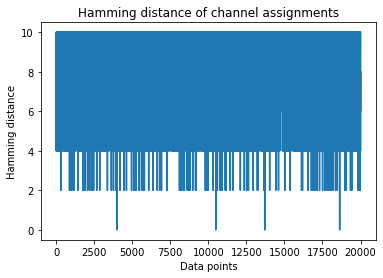

In [202]:
plt.plot(hamm_point_mismatch)
plt.xlabel('Data points')
plt.ylabel('Hamming distance') 
plt.title('Hamming distance of channel assignments') 
# plt.savefig('Hamming distance of channel assignments.pdf')

In [203]:
################## L2 norm or Euclidean distance of power assignments (for test) #########################

In [204]:
ypd_new # test power assignments after training NN

array([[0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       ...,
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ],
       [0.14201507, 0.1337895 , 0.14171444, ..., 0.9870719 , 0.97651505,
        0.9481746 ]], dtype=float32)

In [205]:
ypd_new.shape

(20000, 50)

In [206]:
ypd_new[0]

array([0.14201507, 0.1337895 , 0.14171444, 0.14280984, 0.13978766,
       0.13500574, 0.14380507, 0.14263369, 0.13464125, 0.13980097,
       0.14275758, 0.13999927, 0.14110756, 0.14222096, 0.14182906,
       0.14141998, 0.14142697, 0.14121707, 0.14427717, 0.13969077,
       0.13934186, 0.14557457, 0.14254934, 0.14291397, 0.1434888 ,
       0.9736362 , 0.9869385 , 0.9867863 , 0.97259825, 0.9874944 ,
       0.9870255 , 0.98023874, 0.9868931 , 0.98706985, 0.9111182 ,
       0.8704515 , 0.9868433 , 0.9543202 , 0.9601755 , 0.9864024 ,
       0.82686114, 0.970568  , 0.98726904, 0.9757662 , 0.9881003 ,
       0.9831599 , 0.9866829 , 0.9870719 , 0.97651505, 0.9481746 ],
      dtype=float32)

In [207]:
ypd_new[1]

array([0.14201507, 0.1337895 , 0.14171444, 0.14280984, 0.13978766,
       0.13500574, 0.14380507, 0.14263369, 0.13464125, 0.13980097,
       0.14275758, 0.13999927, 0.14110756, 0.14222096, 0.14182906,
       0.14141998, 0.14142697, 0.14121707, 0.14427717, 0.13969077,
       0.13934186, 0.14557457, 0.14254934, 0.14291397, 0.1434888 ,
       0.9736362 , 0.9869385 , 0.9867863 , 0.97259825, 0.9874944 ,
       0.9870255 , 0.98023874, 0.9868931 , 0.98706985, 0.9111182 ,
       0.8704515 , 0.9868433 , 0.9543202 , 0.9601755 , 0.9864024 ,
       0.82686114, 0.970568  , 0.98726904, 0.9757662 , 0.9881003 ,
       0.9831599 , 0.9866829 , 0.9870719 , 0.97651505, 0.9481746 ],
      dtype=float32)

In [208]:
y_test

array([[ 0.01462454,  0.0561331 ,  1.        , ...,  0.24606178,
         0.10954462,  0.20230156],
       [ 0.00622937,  0.11849587,  1.        , ..., -0.00415675,
         0.0821782 ,  0.44804671],
       [ 1.        ,  0.06988809,  0.00574142, ...,  0.41529969,
         0.00549667,  0.22907365],
       ...,
       [ 0.02609397,  0.02011302,  0.04177459, ...,  0.11921569,
         0.25089991,  0.15840992],
       [ 0.00672735,  0.02278807,  0.02085253, ...,  0.        ,
         0.35552579,  0.33208167],
       [ 0.00626899,  0.01752107,  0.00490454, ..., -0.00287454,
         0.24768001,  0.29266391]])

In [209]:
y_test.shape

(20000, 75)

In [210]:
y_pd_orig=y_test[0:,0:50] # Power assignments before training NN
y_pd_orig

array([[0.01462454, 0.0561331 , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00622937, 0.11849587, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.06988809, 0.00574142, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.02609397, 0.02011302, 0.04177459, ..., 1.        , 1.        ,
        1.        ],
       [0.00672735, 0.02278807, 0.02085253, ..., 1.        , 1.        ,
        1.        ],
       [0.00626899, 0.01752107, 0.00490454, ..., 1.        , 1.        ,
        1.        ]])

In [211]:
y_pd_orig.shape

(20000, 50)

In [212]:
y_pd_orig[0]

array([0.01462454, 0.0561331 , 1.        , 0.01209887, 0.00993946,
       0.01081521, 0.00651141, 0.04357241, 0.0028349 , 0.00375976,
       0.07130549, 0.00401581, 0.00912608, 0.00335514, 0.00742667,
       0.01391068, 0.016392  , 0.07782706, 0.02818753, 0.01395834,
       0.0161243 , 1.        , 0.00854703, 0.38225952, 0.05665175,
       1.        , 1.        , 0.60695055, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [213]:
y_pd_orig[1]

array([0.00622937, 0.11849587, 1.        , 0.00350773, 0.00360321,
       0.02946864, 0.01508455, 0.03950807, 0.00617683, 0.04029037,
       0.06515817, 0.12222658, 0.00892004, 0.55284113, 0.01833805,
       0.01656511, 0.02713763, 0.02658338, 0.01810756, 0.08201274,
       0.86271232, 0.07529363, 0.00462775, 0.0212172 , 0.01097866,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [214]:
from scipy.spatial import distance 
import numpy as np

# Creating a vector to store l2 norm or Euclidean distance 
Eucl_dist = np.zeros((len(ypd_new),1)) 

for i in range(len(ypd_new)):
    Eucl_dist[i] = distance.euclidean(ypd_new[i,:], y_pd_orig[i,:]) # To get l2 norm
    
print(Eucl_dist)
print(sum(Eucl_dist)/len(Eucl_dist)) # Average Euclidean distance

[[1.43375481]
 [1.33172287]
 [1.42934154]
 ...
 [0.73305008]
 [0.78343569]
 [0.67966331]]
[1.46753135]


In [215]:
Eucl_dist.shape

(20000, 1)

Text(0.5, 1.0, 'Euclidean distance of Power assignments')

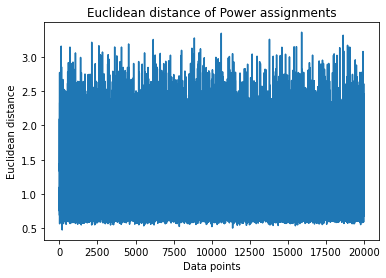

In [216]:
plt.plot(Eucl_dist)
plt.xlabel('Data points')
plt.ylabel('Euclidean distance') 
plt.title('Euclidean distance of Power assignments') 
# plt.savefig('Euclidean distance of Power assignments.pdf')

In [217]:
model.save('baseline_model_perfect_CSI.h5')

In [218]:
#done